# Libraries and Data

This section calls the libraries, download BIGS dataset (source https://gcxgce.sharepoint.com/teams/10001208/SitePages/Access-BIGS-Data.aspx), GDP deflator dataset from StatsCan.

It also creates the dictionaries used for labelling figures.

In [43]:
#@title Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from os import name
import openpyxl
from google.colab import files

# !pip install wget
import wget

# %pip install adjustText
from adjustText import adjust_text

In [2]:
#@title BIGS 2014-2022
# Download the Raw Excel File
url = 'https://www.dropbox.com/scl/fi/syslh7f82ome0msxownlb/BIGS_ProgramStream_Tables_2014_2022_Final.xlsx?rlkey=j2ioh9brd4noc587m5wlckevg&dl=0'
# Modify the URL to download the raw file content
url = url.replace('dl=0', 'dl=1')
filename = wget.download(url)

In [3]:
#@title GDP Deflator
url = 'https://www.dropbox.com/scl/fi/y7i8idmvo2rqf7i6f6qth/3610022301-eng.csv?rlkey=y8gqxyvnc54rw9p4ws46wuc64&dl=0'
# Modify the URL to download the raw file content
url = url.replace('dl=0', 'dl=1')
filename = wget.download(url)

price_index = pd.read_csv('3610022301-eng.csv', header=9)
price_index = price_index.head(2).dropna()
price_index = pd.melt(price_index, id_vars=['Estimates'], var_name='year', value_name='price_index').drop(columns='Estimates')
price_index['price_index'] = price_index['price_index'].astype(float)/100
price_index['year'] = price_index['year'].astype(int)

In [4]:
#@title Load  the data
dataframes = {}
dataframes_total = {}
dataframes_ised = {}
dataframes_performance = {}

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 1',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'type',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
df
dataframes['beneficiary'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 2',header=3,skipfooter=10)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})

dataframes['support_type'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 3',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['enterprise_type'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 4',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'type',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['age'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 5',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['support_intensity'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 6',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})

dataframes['province'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 7',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['industry'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 8',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['rd'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 9',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['export'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 10',header=3,skipfooter=7)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['support_rev'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 11',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Employment\nsize': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['emp'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 12',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'Province/territory':'Province',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Employment\nsize': 'type',
                        'High-growth-by-revenue\nstatus': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nultimate\nbeneficiary\nentreprises': 'num',
                        'Total value of\nsupport to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value',
                        'Total value\nof support to\nultimate\nbeneficiary\nenterprises\n(rounded to\nnearest\nthousands\ndollars)': 'value'})
dataframes['hg'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 13',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'High-growth-by-revenue\nstatus':'emp',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nenterprises\nwith non\nzero net\nincome (or\nloss) before\ntax and\npositive\nemployment\nin the year\nof support.': 'num_pos_inc',
                        'Number of\nenterprises\nwith non\nzero net\nincome (or\nloss) before\ntax and\npositive\nemployment\nin both the\nyear of\nsupport and\nthree years\nafter': 'num_pos_inc3',
                        'Median\nthree-year\nchange in\nproductivity\n($ net\nincome (or\nloss) before\ntax +\nannual pay\n/ number of\nemployees)\nbetween\nthe year of\nsupport\nand three\nyears after': 'median_prod'})
dataframes_performance['prod'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 14',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'High-growth-by-revenue\nstatus':'emp',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nenterprises\nwith\npositive\nrevenue in\nthe year of\nsupport': 'num_pos_rev',
                        'Number of\nenterprises\nwith\npositive\nrevenue in\nboth the\nyear of\nsupport\nand three\nyears after': 'num_pos_rev3',
                        'Median\nthree-year\npercentage\nrevenue\ngrowth\nbetween\nthe year of\nsupport\nand three\nyears after': 'median_rev'})
dataframes_performance['rev'] = df

df = pd.read_excel('BIGS_ProgramStream_Tables_2014_2022_Final.xlsx',sheet_name='Table 15',header=3,skipfooter=8)
df = df.rename(columns={'Year of\nSupport': 'year',
                        'Program ID': 'program_id',
                        'Program': 'program',
                        'High-growth-by-revenue\nstatus':'emp',
                        'Type of support': 'type',
                        'Type of enterprise': 'type',
                        'Value of support': 'type',
                        'Region': 'type',
                        'Industry': 'type',
                        'R&D\nperformer\nstatus': 'type',
                        'Exporter\nstatus': 'type',
                        'Support as a\nproportion of revenue': 'type',
                        'Value of Support\nLevel': 'value_level',
                        'Type of\nbeneficiary': 'beneficiary',
                        'Firm age': 'age',
                        'Number of\nenterprises\nwith\npositive\nemployment\nin the year\nof support': 'num_pos_emp',
                        'Number of\nenterprises\nwith\npositive\nemployment\nin both the\nyear of\nsupport and\nthree years\nafter': 'num_pos_emp3',
                        'Median\nthree-year\npercentage\nemployment\ngrowth\nbetween the\nyear of\nsupport and\nthree years\nafter': 'median_emp'})

dataframes_performance['emp'] = df

In [5]:
#@title Dictionaries
outcome_label = {'value': 'Support Value in Million \$ (2017 dollar)',
                 'num': 'Number of Enterprise',
                 'avg_value': 'Average Support in Thousand \$ (2017 dollar)',
                 'program_num': 'Number of Programs',
                 'percent': 'Percentage'
}
outcome_label2 = {'value': '% Support Value',
                 'num': '% Enterprise',
                 'avg_value': '% Average Support'}

outcome_title = {'value': 'Annual Support',
                 'num': 'Number of Enterprise',
                 'avg_value': 'Average Support',
                 'program_num': 'Number of Programs'
}
ised_colors = {
    'ISED': 'blue',
    'non-ISED': 'dimgrey'
}
ised_colors = {
    'ISED': 'blue',     # Blue
    'non-ISED BIGS': 'dimgrey'
}

program_colors = {
    'SIF': 'blue',
    'IRAP (NRC)': 'deepskyblue',
    'NSERC': 'deepskyblue',
    'Mitacs (ISED)': 'blue',
    'GIC': 'blue',
    'RDAs': 'deepskyblue',
    'SBF (ISED)': 'blue'
}
programs_markers = {
    'SIF': 'o',
    'IRAP (NRC)': 's',
    'NSERC': '^',
    'Mitacs (ISED)': 'D',
    'GIC': '*',
    'RDAs': 'x',
    'SBF (ISED)': 'o'  # Repeats if more programs than markers
}

ISED_porfolio_list = ['Atlantic Canada Opportunities Agency',
                      'Canadian Northern Economic Development Agency',
                      'Canada Economic Development for Quebec Regions',
                      'Federal Economic Development Agency for Southern Ontario',
                      'Federal Economic Development Agency for Northern Ontario',
                      'PACIFICAN',
                      'PRAIRIESCAN',
                      'National Research Council of Canada',
                      'Natural Sciences and Engineering Research Council',
                      'Canadian Space Agency',
                      'Western Economic Diversification Canada']
ISED_porfolio_list2 = ['ACOA_APECA',
                       'CanNor',
                       'CED_DEC',
                       'CSA_ASC',
                       'PACIFICAN', 'PacifiCan',
                       'PRAIRIESCAN', 'PrairieCan',
                       'FEDDEV', 'FedDev'
                       'FEDNOR', 'FedNor',
                       'NRC_CNRC',
                       'NSERC_CRSNG',
                       'NSERC',
                       'WD_DEO']
RDA_list = ['ACOA_APECA',
            'CanNor',
            'CED_DEC',
            'PACIFICAN', 'PacifiCan',
            'PRAIRIESCAN', 'PrairieCan',
            'FEDDEV', 'FedDev'
            'FEDNOR', 'FedNor',
            'WD_DEO'
            ]

labels = {'beneficiary': 'Beneficiary Type',
          'support_type': 'Support Type',
          'enterprise_type': 'Enterprise Type',
          'age': 'Firm Age',
          'support_intensity': 'Support',
          'province': 'Region',
          'industry': 'Industry',
          'export': 'Export Status',
          'rd': 'R&D Status',
          'support_rev': 'Support as a Proportion of Revenue',
          'emp': 'Firm Size by Employment',
          'hg': 'High-Growth (HG) by Revenue'}

custom_category_order = ['support_intensity', 'support_rev', 'province', 'industry', 'emp', 'age', 'rd', 'export', 'hg']

color_mapping = {
    'beneficiary': '#1f77b4',        # Blue
    'support_type': '#ff7f0e',       # Orange
    'enterprise_type': '#2ca02c',    # Green
    'age': '#d62728',                # Red
    'support_intensity': '#9467bd',  # Purple
    'province': '#8c564b',           # Brown
    'industry': '#e377c2',           # Pink
    'export': '#7f7f7f',             # Gray
    'rd': '#bcbd22',                 # Olive
    'support_rev': '#17becf',        # Teal
    'emp': '#aec7e8',                # Light Blue
    'hg': '#ffbb78'                  # Light Orange
}

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1974588080.py:2: SyntaxWarning: invalid escape sequence '\$'
  outcome_label = {'value': 'Support Value in Million \$ (2017 dollar)',
/tmp/ipython-input-1974588080.py:4: SyntaxWarning: invalid escape sequence '\$'
  'avg_value': 'Average Support in Thousand \$ (2017 dollar)',


# BIGS Over Time

In [6]:
#@title Clean data
df = dataframes['beneficiary'].copy()

# merge in price deflator
df = df.merge(price_index, on='year')

for col in ['value', 'num']:
  df[col] = df[col].replace('X', np.nan)
  df[col] = df[col].replace('x', np.nan)
  df[col] = df[col].replace('...', np.nan)
  df[col] = df[col].astype(str).str.replace(',', '').astype(float)

df['value'] = df['value']/1e6
df['value'] = df['value']/df['price_index']
df['avg_value'] = df['value']/df['num'] *1e3

# remove special characters
df['program']     = df['program'].astype(str).str.replace("\n", " ")
df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
df['type']        = df['type'].astype(str).str.replace("\n", " ")

# drop support with zero value i.e. advisory services
df = df[df['value_level'].str.contains('Total')]
df = df[df['type'].str.contains('Total')]
df = df.drop(columns='value_level')

# identify CSBFP
df_SBF = df[df['program'].str.contains('Canada Small Business Financing Program', na=False )].copy()
df_SBF = df_SBF[df_SBF['type'].str.contains('Total')]
df_SBF['ised'] = 'ISED'

## identify agencey-level support
df = df[~df['program_id'].astype(str).str.match(r'^\d')]
df = df[~df['program_id'].isin(['IRAP', 'NONIRAP'])]

df_total  = df[df['program_id'].isin(['TOTAL'])].copy()
df        = df[~df['program_id'].isin(['TOTAL'])]

# to avoid suppressed values (which exists even at the agency level), I manually compute the non-ISED BIGS value
df_nonISED  = df_total
df_ISED     = df[df['program_id'].str.contains('ISED')].copy()
df_ISED.loc[:,'ised'] = 'ISED'


df_ISED_porfolio = df[df['program_id'].isin(ISED_porfolio_list2)]
df_ISED_porfolio = df_ISED_porfolio.groupby(['year']).agg(value=('value', 'sum'),
                                                          num=('num', 'sum')).reset_index()
df_ISED_porfolio.loc[:,'ised'] = 'ISED Porfolio'

df_nonISED = df_nonISED.merge(df_ISED[['year', 'value', 'num']], on='year', how='left', suffixes=('', '_ISED'))
df_nonISED = df_nonISED.merge(df_ISED_porfolio[['year', 'value', 'num']], on='year', how='left', suffixes=('', '_ISED_porfolio'))
df_nonISED['value'] -= (df_nonISED['value_ISED'] + df_nonISED['value_ISED_porfolio'])
df_nonISED['num']   -= (df_nonISED['num_ISED'] - df_nonISED['num_ISED_porfolio'])
df_nonISED.loc[:,'ised'] = 'non-ISED'

df_total = pd.concat([df_ISED, df_ISED_porfolio, df_nonISED], axis=0)
df_total = df_total[['year', 'ised', 'value', 'num']]
df_total['year'] = df_total['year'].astype('int')

# subtract the value of CSBFP from total ISED support
df_ISED = df_total.merge(df_SBF[['year', 'ised', 'value', 'num']], on=['year', 'ised'], how='left', suffixes=('', '_y'))
df_ISED['value_y'] = df_ISED['value_y'].fillna(0)
df_ISED['value'] -= df_ISED['value_y']

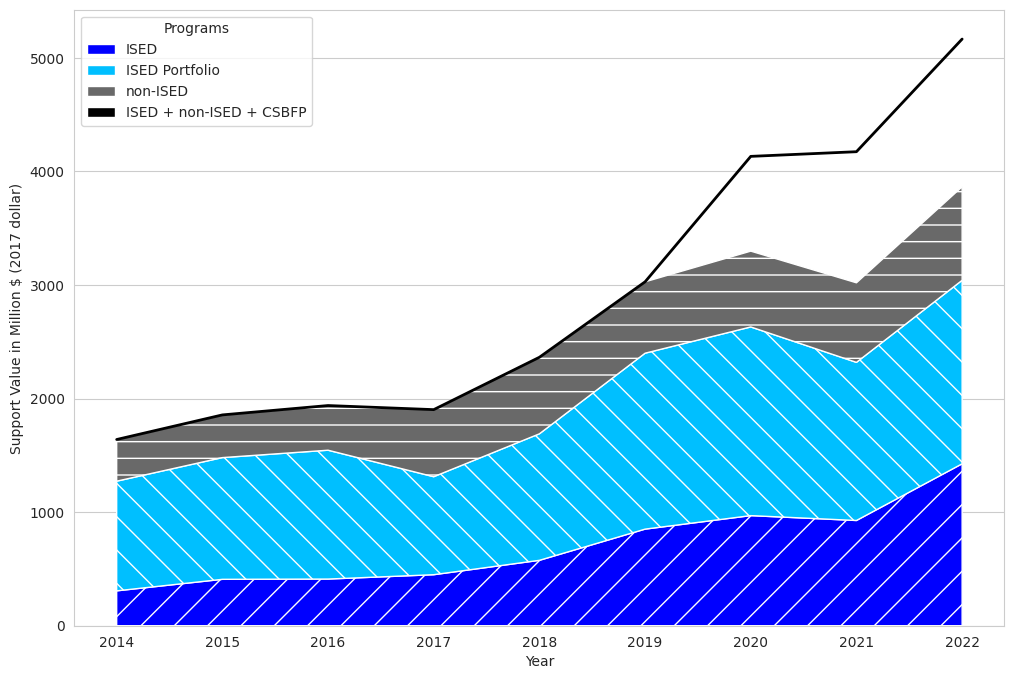

In [7]:
# @title total value
table_data = df_ISED.copy()
table_data['year'] = table_data['year'].astype('int')

table_data2 = df_total.groupby(['year']).agg(value=('value', 'sum'))

for outcome in ['value']:
  # Figure
  # Plot time series for each type in a single figure
  plt.figure(figsize=(12, 8))
  sns.set_style("whitegrid")
  sns.set_palette(['blue', 'deepskyblue',  'dimgrey'])
  hatch_patterns = ['/', '\\', '-', '|', '+', 'x', 'o', 'O', '.', '*']

  df_pivot = table_data.pivot(index='year', columns='ised', values=outcome)
  df_pivot = df_pivot.fillna(0).dropna()
  plt.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, hatch=hatch_patterns)

  plt.legend(loc='upper left')
  plt.xlabel('Year')
  plt.ylabel(f'{outcome_label[outcome]}')
  plt.grid(axis='x')

  df_pivot2 = table_data2.copy()
  df_pivot2 = df_pivot2.fillna(0).dropna()
  plt.plot(df_pivot2.index, df_pivot2[outcome], label='ISED', color='black', linewidth=2)
  plt.legend(title='Programs', loc='upper left', handles=[Patch(facecolor='blue', label='ISED'),
                                                          Patch(facecolor='deepskyblue', label='ISED Portfolio'),
                                                          Patch(facecolor='dimgrey', label='non-ISED'),
                                                          Patch(facecolor='black', label='ISED + non-ISED + CSBFP')
                                                          ])
  plt.savefig(f"{outcome}_ised2_ts.png", bbox_inches='tight')
  plt.show()

  with pd.ExcelWriter(f"{outcome}_ised2_ts.xlsx") as writer:
    start_row = 0
    df_pivot.to_excel(writer, sheet_name=outcome, startrow = start_row, index=True)
    start_row += len(df_pivot) + 2
    df_pivot2['value'].to_excel(writer, sheet_name=outcome, startrow = start_row, index=True)

# Surge in the Number of Programs

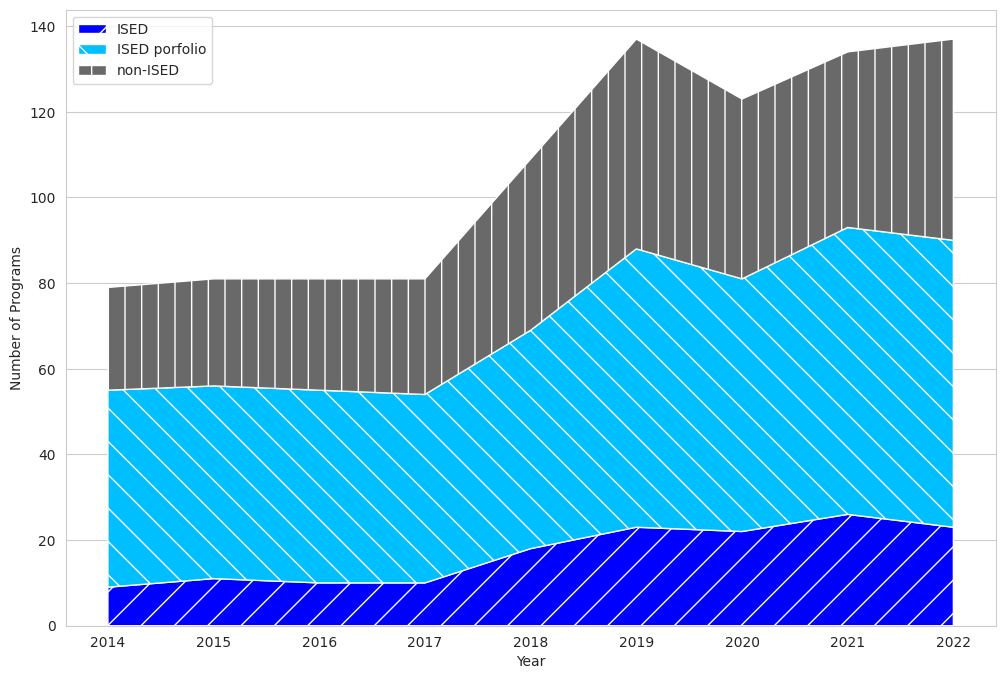

In [8]:
#@title Figure
df = dataframes['beneficiary'].copy()

# remove special characters
df['program']     = df['program'].astype(str).str.replace("\n", " ")
df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
df['type']        = df['type'].astype(str).str.replace("\n", " ")

# drop support with zero value i.e. advisory services
df = df[df['value_level'].str.contains('Total')]
df = df[df['type'].str.contains('Total')]
df = df.drop(columns='value_level')

# create a dataframe caputring support by programs
# Identify all the programs and drop the aggregated observations to avoid double-counting
# here I manually include IRAP, Non IRAP programs
df = df[  (df['program_id'].str.contains('Total') ) |
          (df['program_id'].str.contains('_00') ) |
          (df['program_id'].str.contains('IRAP') )
      ]
# drop NONIRAP aggregates
df = df[ ~df['program_id'].str.contains('excluding IRAP')  ]

df['program_id'] = df['program_id'].str.replace("_00", '')
df['program_id'] = df['program_id'].str.replace("(Total)", '')
df['program_id'] = df['program_id'].str.strip()

df['program'] = df['program'].str.replace("(Total)", '')
df['program'] = df['program'].str.strip()

# Drop duplicates where both '_00' and 'Total' are reported
df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

# define 'ised' variable
df.loc[:, 'ised'] = "non-ISED"
df.loc[df['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised'] = 'ISED porfolio'
df.loc[df['program'].str.contains('ISED'), 'ised'] = 'ISED'

table_data = df.groupby(['ised', 'year']).agg(program_num=('program_id', 'nunique')).reset_index()
table_data['year'] = table_data['year'].astype('int')

fig = plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

df_pivot = table_data.pivot(index='year', columns='ised', values='program_num')
df_pivot = df_pivot.fillna(0).dropna()

plt.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, hatch=hatch_patterns)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Programs')
plt.grid(axis='x')
plt.savefig("num_programs_ised_ts.png", bbox_inches='tight')
plt.show()

with pd.ExcelWriter("num_programs_ised_ts.xlsx") as writer:
  start_row = 0
  df_pivot.to_excel(writer, sheet_name=outcome, startrow = start_row, index=True)

# Role of ISED and Portfolio

In [9]:
#@title Clean data
dataframes_clean = {}

for key in ['beneficiary']:
  df = dataframes[key].copy()

  for col in ['value', 'num']:
    df[col] = df[col].replace('X', np.nan)
    df[col] = df[col].replace('x', np.nan)
    df[col] = df[col].replace('...', np.nan)
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

  df['value'] = df['value']/1e6
  df['avg_value'] = df['value']/df['num'] *1e3

  # remove special characters
  df['program']     = df['program'].astype(str).str.replace("\n", " ")
  df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
  df['type']        = df['type'].astype(str).str.replace("\n", " ")

  # Drop aggregated value to avoid double-counting
  df = df[df['value_level'].str.contains('Total')]
  df = df[df['type'].str.contains('Total')]
  df.drop(columns='value_level', inplace=True)

  # identify program-level support
  # Identify all the programs and drop the disaggregated observations to avoid suppressed values
  # here I manually include IRAP, Non IRAP programs
  df = df[  (df['program_id'].str.contains('Total') ) |
            (df['program_id'].str.contains('_00') ) |
            (df['program_id'].str.contains('IRAP') )
        ]

  # drop all the subprograms of NRC expect for IRAP and NONIRAP
  df = df[~df['program_id'].str.contains('NONIRAP') ]

  df['program_id'] = df['program_id'].str.replace("_00", '')
  df['program_id'] = df['program_id'].str.replace("(Total)", '')
  df['program_id'] = df['program_id'].str.strip()

  df['program'] = df['program'].str.replace("(Total)", '')
  df['program'] = df['program'].str.strip()

  # Drop duplicates where both '_00' and 'Total' are reported
  df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

  dataframes_clean[key] = df

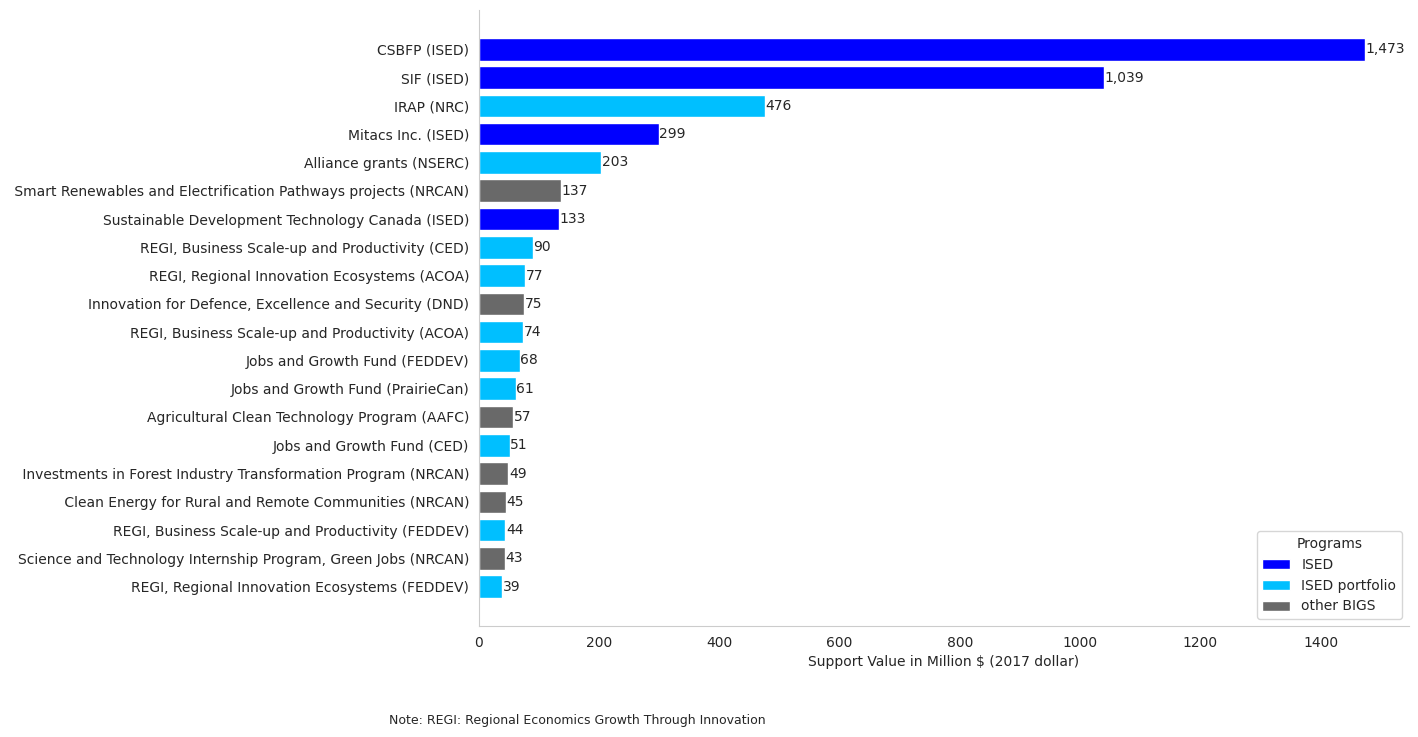

In [10]:
#@title BIGS 2022, by programs
df = dataframes_clean['beneficiary'].copy()
df = df[df['year'] == 2022].dropna(subset=['value'])
df['value'] = df['value'].astype(int)

df['color'] = 'dimgrey'
df.loc[df.program.str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'
df.loc[df.program.str.contains('ISED_ISDE'), 'color'] = 'blue'

df['agency'] = [p.split(' - ')[0] for p in df.program]
df['agency'] = [p.split('_')[0] for p in df.agency]
df['programs'] = [p.split(' - ')[1:] for p in df.program]
df['program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(df['programs'], df['agency'])]

# rename program labels
df['program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
df['program'] = df['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
df['program'] = df['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
df['program'] = df['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
df['program'] = df['program'].str.replace('Contributions in support of', '', regex=False)
df['program'] = df['program'].str.replace('Contributions in Support of', '', regex=False)

# shorten the names
df['program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)

df = df.dropna(subset='value').sort_values(by='value').tail(20)

# color = color[['color', 'label']]
plt.figure(figsize=(12, 8))
bars = plt.barh(df['program'], df['value'], color = df['color'])

# Display the value at the end of each bar
for bar, pct in zip(bars, df['value']):
  plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct:,.0f}', va='center')

legend_elements = [
    Patch(facecolor='blue', label='ISED'),
    Patch(facecolor='deepskyblue', label='ISED portfolio'),
    Patch(facecolor='dimgrey', label='other BIGS')
]
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

plt.xlabel(outcome_label['value'])
plt.legend(title='Programs', loc='lower right', handles=legend_elements)
plt.figtext(0.05 , 0, 'Note: REGI: Regional Economics Growth Through Innovation', fontsize=9, ha='left', va='top')
plt.savefig("value_by_program.png", bbox_inches='tight')
plt.show()

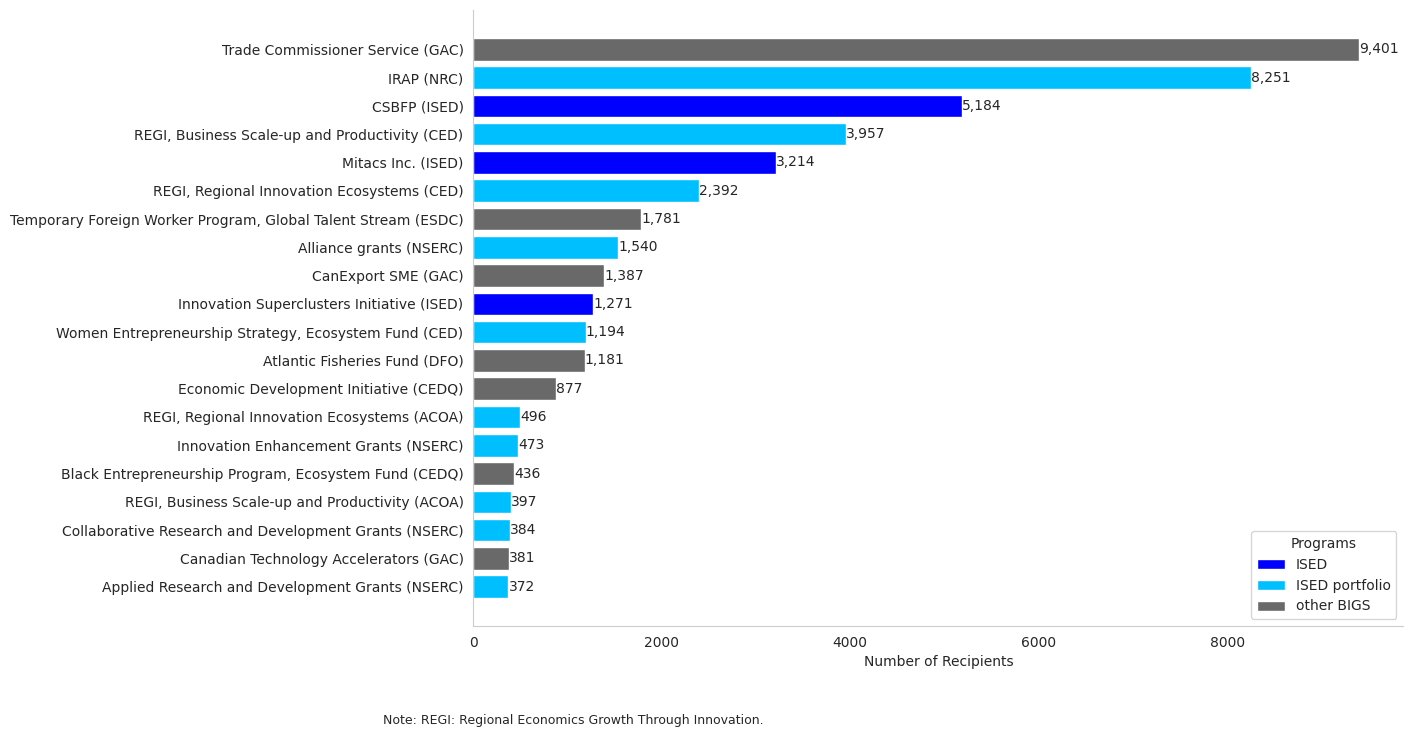

In [11]:
#@title BIGS 2022, Number of Recipients
df = dataframes_clean['beneficiary'].copy()
df = df[df['type'] == 'Total']
df = df[df['year'] == 2022].dropna(subset=['num'])

df.loc[:, 'color'] = 'dimgrey'
df.loc[df.program.str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'
df.loc[df.program.str.contains('ISED_ISDE'), 'color'] = 'blue'

df['agency'] = [p.split(' - ')[0] for p in df.program]
df['agency'] = [p.split('_')[0] for p in df.agency]
df['programs'] = [p.split(' - ')[1:] for p in df.program]
df['program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(df['programs'], df['agency'])]

# rename program labels
df['program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
df['program'] = df['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
df['program'] = df['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
df['program'] = df['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
df['program'] = df['program'].str.replace('Contributions in support of', '', regex=False)
df['program'] = df['program'].str.replace('Contributions in Support of', '', regex=False)

# shorten the names
df['program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)

df = df.dropna(subset='num').sort_values(by='num').tail(20)

# color = color[['color', 'label']]
plt.figure(figsize=(12, 8))
bars = plt.barh(df['program'], df['num'], color = df['color'])

# Display the value at the end of each bar
for bar, pct in zip(bars, df['num']):
  plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct:,.0f}', va='center')

legend_elements = [
    Patch(facecolor='blue', label='ISED'),
    Patch(facecolor='deepskyblue', label='ISED portfolio'),
    Patch(facecolor='dimgrey', label='other BIGS')
]
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

plt.xlabel('Number of Recipients')
plt.legend(title='Programs', loc='lower right', handles=legend_elements)
plt.figtext(0.05 , 0, 'Note: REGI: Regional Economics Growth Through Innovation.',
              fontsize=9, ha='left', va='top')
plt.savefig("num_by_program.png", bbox_inches='tight')
plt.show()

df.to_excel("num_by_program.xlsx", index=False)

# Flagship Programs

In [12]:
#@title Clean data
dataframes_clean = {}

for key in ['beneficiary']:
  df = dataframes[key].copy()

  for col in ['value', 'num']:
    df[col] = df[col].replace('X', np.nan)
    df[col] = df[col].replace('x', np.nan)
    df[col] = df[col].replace('...', np.nan)
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

  df['value'] = df['value']/1e6
  df['avg_value'] = df['value']/df['num'] *1e3

  # remove special characters
  df['program']     = df['program'].astype(str).str.replace("\n", " ")
  df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
  df['type']        = df['type'].astype(str).str.replace("\n", " ")

  # Drop aggregated value to avoid double-counting
  df = df[df['value_level'].str.contains('Total')]
  df = df[df['type'].str.contains('Total')]
  df.drop(columns='value_level', inplace=True)

  df_total = df[df['program_id'].isin(['TOTAL'])].copy()
  df        = df[~df['program_id'].isin(['TOTAL'])]

  # identify program-level support
  # Identify all the programs and drop the disaggregated observations to avoid suppressed values
  # here I manually include IRAP, Non IRAP programs
  df = df[  (df['program_id'].str.contains('Total') ) |
            (df['program_id'].str.contains('_00') ) |
            (df['program_id'].str.contains('IRAP') ) |
            (df['program_id'].str.contains('|'.join(RDA_list))) |
            (df['program_id'].str.contains('NSERC_CRSNG'))
        ]

  # drop all the subprograms of NRC expect for IRAP and NONIRAP
  df = df[ ~df['program_id'].str.contains('NONIRAP') ]

  # include RDAs at the agency-level
  df = df[( ~df['program_id'].astype(str).str.match(r'^\d') ) |
          ( ~df['program'].str.contains('|'.join(RDA_list)) )
          ]

  df['program_id'] = df['program_id'].str.replace("_00", '')
  df['program_id'] = df['program_id'].str.replace("(Total)", '')
  df['program_id'] = df['program_id'].str.strip()

  df['program'] = df['program'].str.replace("(Total)", '')
  df['program'] = df['program'].str.strip()

  # Drop duplicates where both '_00' and 'Total' are reported
  df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

  # Select Programs
  df.loc[df['program'].str.contains('Canada Small Business Financing Program', na=False ), 'program_select'] = 'CSBFP (ISED)'
  df.loc[df['program'].str.contains('Strategic Innovation Fund', na=False ), 'program_select'] = 'SIF (ISED)'
  df.loc[df['program'].str.contains('Mitacs', na=False ), 'program_select'] = 'Mitacs (ISED)'
  df.loc[df['program'].str.contains('Innovation Superclusters Initiative', na=False ), 'program_select'] = 'GIC (ISED)'
  df.loc[df['program_id'].str.match('IRAP', na=False ), 'program_select'] = 'IRAP (NRC)'
  df.loc[df['program_id'].str.contains('NSERC', na=False ), 'program_select'] = 'NSERC'
  df.loc[df['program_id'].str.contains('|'.join(RDA_list)), 'program_select'] = 'RDAs'

  dataframes_clean[key] = df

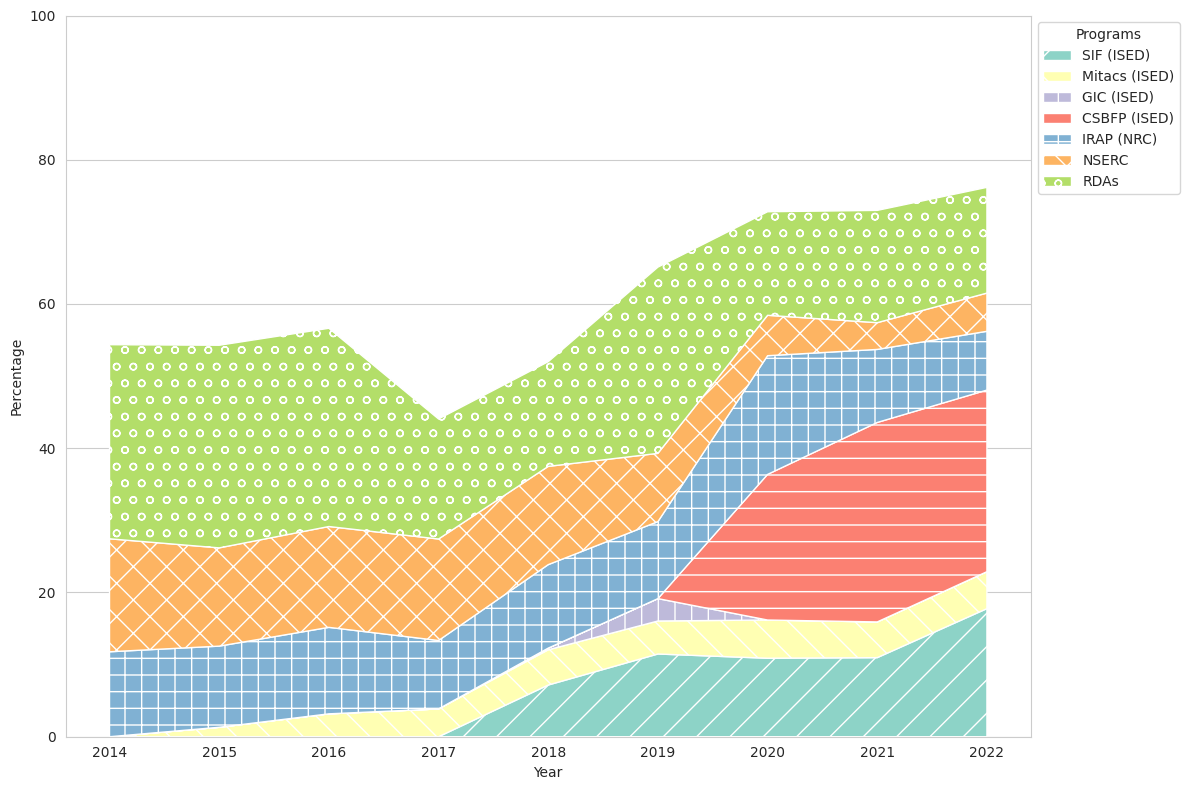

In [13]:
# @title percentage by Select Programs,  2014-2022
df = df[~df['program_select'].isin(['Other'])]
df = df.groupby('year').agg(value=('value', 'sum')).reset_index()

df_total = df_total.merge(df, on='year', how='left', suffixes=('_total', '_select'))
df_total['value'] = df_total['value_total'] - df_total['value_select']
df_total['program_select'] = 'Other'

df = dataframes_clean['beneficiary'].copy()
df = df[df['type'] == 'Total']
df = df[~df['program_select'].isin(['Other'])]
df = pd.concat([df, df_total]).groupby(['year', 'program_select']).agg(value=('value', 'sum')).reset_index()

df_total = df_total.groupby('year').agg(value_total=('value_total', 'sum')).reset_index()
df = df.merge(df_total, on='year', how='left')
df['percent'] = df['value']/df['value_total']*100

df_pivot = df.pivot(index='year', columns='program_select', values='percent')
df_pivot = df_pivot.fillna(0).dropna()
df_pivot = df_pivot[['SIF (ISED)',
                     'Mitacs (ISED)',
                     'GIC (ISED)',
                     'CSBFP (ISED)',
                     'IRAP (NRC)',
                     'NSERC',
                     'RDAs']]

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("Set3")
# sns.set_palette(['blue', 'dimgrey', 'deepskyblue'])
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

plt.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, hatch=hatch_patterns)

plt.xlabel('Year')
plt.tick_params(axis='x')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='x')
plt.legend(title='Programs', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(f"percent_select_programs_ts.png", bbox_inches='tight')
plt.show()

# BIGS Support by Type, 2022

In [14]:
# @title Clean data
dataframes_clean = {}

for key in dataframes.keys():
  df = dataframes[key]

  for col in ['value', 'num']:
    df[col] = df[col].replace('X', np.nan)
    df[col] = df[col].replace('x', np.nan)
    df[col] = df[col].replace('...', np.nan)
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

  df['value'] = df['value']/1e6
  df['avg_value'] = df['value']/df['num'] *1e3

  # remove special characters
  df['program']     = df['program'].astype(str).str.replace("\n", " ")
  df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
  df['type']        = df['type'].astype(str).str.replace("\n", " ")

  # Drop aggregated value to avoid double-counting
  df = df[df['value_level'].str.contains('Total')]
  df = df[~df['type'].str.contains('Total')]
  df.drop(columns='value_level', inplace=True)

  ## create a dataframe capturing TOTAL SUPPORT by type
  df2 = df[df['program_id'].isin(['TOTAL'])].copy()
  dataframes_total[key] = df2

  # create a dataframe caputring support by programs
  # Identify all the programs and drop the disaggregated observations to avoid suppressed values
  # here I manually include IRAP, Non IRAP programs
  df = df[  (df['program_id'].str.contains('Total') ) |
            (df['program_id'].str.contains('_00') ) |
            (df['program_id'].str.contains('IRAP') )
        ]

  # drop all the subprograms of NRC expect for IRAP and NONIRAP
  df = df[~df['program_id'].str.contains('NONIRAP') ]

  df['program_id'] = df['program_id'].str.replace("_00", '')
  df['program_id'] = df['program_id'].str.replace("(Total)", '')
  df['program_id'] = df['program_id'].str.strip()

  df['program'] = df['program'].str.replace("(Total)", '')
  df['program'] = df['program'].str.strip()

  # Drop duplicates where both '_00' and 'Total' are reported
  df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

  # Select Programs
  df['program_select'] = df['program']
  df.loc[df['program'].str.contains('Canada Small Business Financing Program', na=False ), 'program_select'] = 'CSBFP (ISED)'
  df.loc[df['program'].str.contains('Strategic Innovation Fund', na=False ), 'program_select'] = 'SIF (ISED)'
  df.loc[df['program_id'].str.match('IRAP', na=False ), 'program_select'] = 'IRAP (NRC)'
  df.loc[df['program'].str.contains('Mitacs', na=False ), 'program_select'] = 'Mitacs (ISED)'
  df.loc[df['program'].str.contains('Innovation Superclusters Initiative', na=False ), 'program_select'] = 'GIC (ISED)'

  dataframes_clean[key] = df

/tmp/ipython-input-536107459.py:101: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3 = df_agg.groupby('type').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)


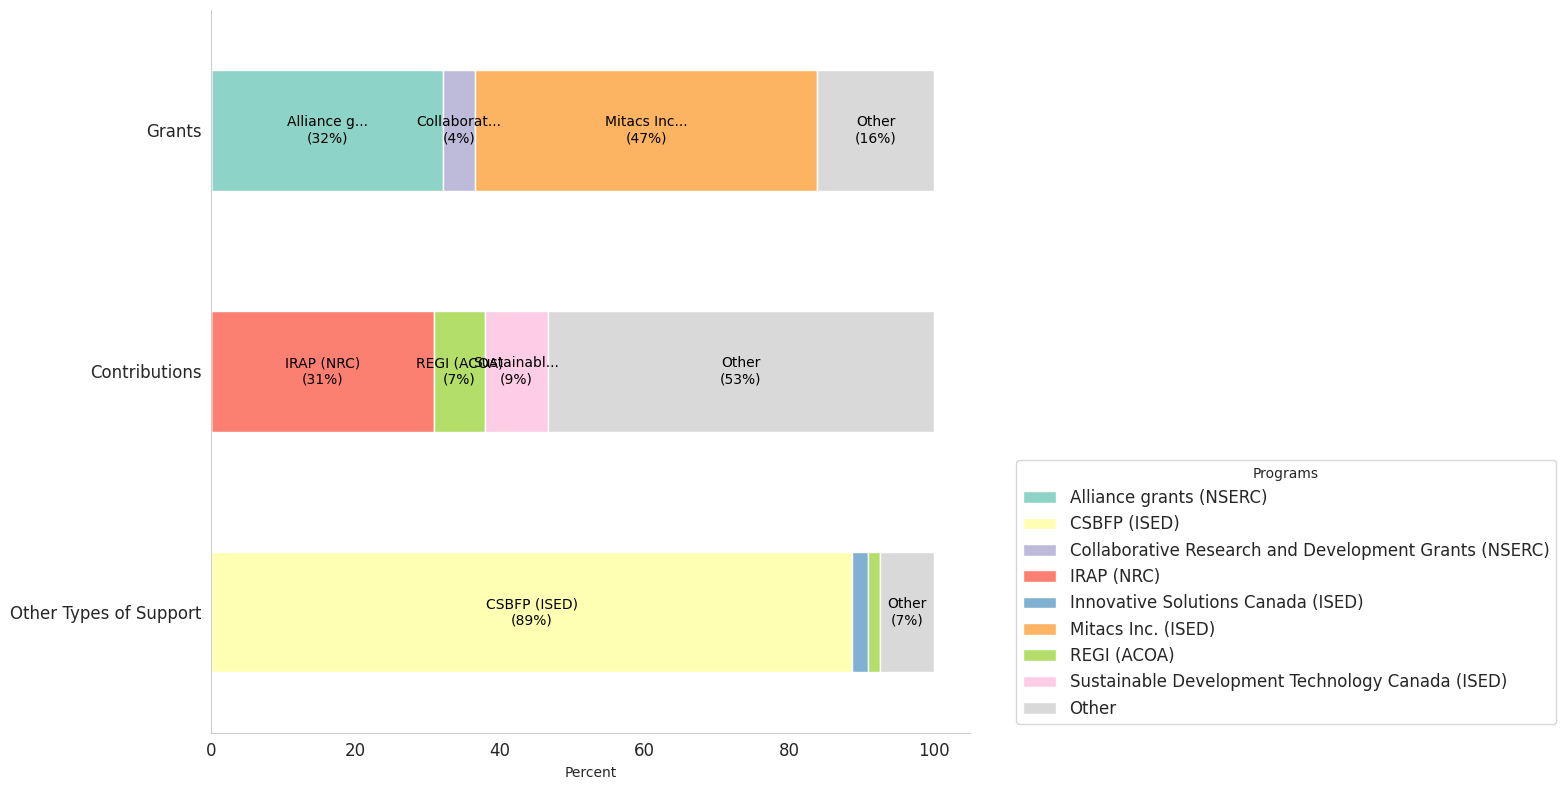

In [15]:
# @title Program Characteristics
# for key in ['beneficiary', 'support_type', 'support_intensity', 'support_rev', 'enterprise_type']:
for key in ['support_type']:
  df = dataframes_clean[key].copy()
  total = dataframes_total[key].copy()

  if key == 'beneficiary':
    type_list = ['Direct', 'Indirect']
  elif key == 'support_type':
    df.loc[df['program'].str.contains('Strategic Innovation Fund'), 'type'] = 'Contribution'
    df = df[~df.type.isin(['Total'])]
    df['type_select'] = 'Other Types of Support'
    df.loc[df['type'].str.contains('Contribution'), 'type_select']      = 'Contributions'
    df.loc[df['type'].str.contains('Grant'), 'type_select']             = 'Grants'
    df.loc[df['type'].str.contains('Advisory Services'), 'type_select'] = 'Advisory Services'
    df['type'] = df['type_select']

    total = total[~total.type.isin(['Total'])]
    total['type_select'] = 'Other Types of Support'
    total.loc[total['type'].str.contains('Contribution'), 'type_select']      = 'Contributions'
    total.loc[total['type'].str.contains('Grant'), 'type_select']             = 'Grants'
    total.loc[total['type'].str.contains('Advisory Services'), 'type_select'] = 'Advisory Services'
    total['type'] = total['type_select']
    type_list = ['Grants', 'Contributions', 'Other Types of Support']
  elif key == 'support_intensity':
    df.loc[df['type'].str.contains('less than'), 'type'] = '< 100k'
    df.loc[df['type'].str.contains('between'), 'type'] = '100k - 1mil'
    df.loc[df['type'].str.contains('more than'), 'type'] = '> 1mil'
    total.loc[total['type'].str.contains('less than'), 'type'] = '< 100k'
    total.loc[total['type'].str.contains('between'), 'type'] = '100k - 1mil'
    total.loc[total['type'].str.contains('more than'), 'type'] = '> 1mil'
    type_list = ['< 100k', '100k - 1mil', '> 1mil']
  elif key == 'support_rev':
    df.loc[df['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
    df.loc[df['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
    df.loc[df['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
    df.loc[df['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
    total.loc[total['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
    total.loc[total['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
    total.loc[total['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
    total.loc[total['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
    type_list = ['< 10%', '10%-25%', '25%-50%', '>50%']
  elif key == 'enterprise_type':
    df = df[~df.type.isin(['Total',
                          'All Types of Enterprise (unique enterprises)',
                          'No data on type of enterprise'])].copy()
    df.loc[df['type'].str.contains('For-profit'), 'type'] = 'For-profit'
    df.loc[df['type'].str.contains('Not-for-profit'), 'type'] = 'Not-for-profit'
    df.loc[df['type'].str.contains('Post-secondary'), 'type'] = 'Post-secondary'

    total = total[~total.type.isin(['Total',
                          'All Types of Enterprise (unique enterprises)',
                          'No data on type of enterprise'])].copy()
    total.loc[total['type'].str.contains('For-profit'), 'type'] = 'For-profit'
    total.loc[total['type'].str.contains('Not-for-profit'), 'type'] = 'Not-for-profit'
    total.loc[total['type'].str.contains('Post-secondary'), 'type'] = 'Post-secondary'
    type_list = ['For-profit', 'Not-for-profit', 'Post-secondary']
  elif key == 'age':
    df = df[df.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
    df.loc[df['type'].str.contains('less'), 'type'] = '< 1 year old'
    df.loc[df['type'].str.contains('More'), 'type'] = '> 20 years old'
    total = total[total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
    total.loc[total['type'].str.contains('less'), 'type'] = '< 1 year old'
    total.loc[total['type'].str.contains('More'), 'type'] = '> 20 years old'
    type_list = ['< 1 year old', '2-5 years old', '6-10 years old', '11-20 years old', '> 20 years old']
  elif key == 'emp':
    type_list = ['Large enterprises', 'Medium Enterprises', 'Small enterprises']

  df = df[df.type.isin(type_list)].copy()
  total = total[total.type.isin(type_list)].copy()
  df = df.groupby(['program_select','type', 'year']).agg(
                                                    value = ('value', 'mean'),
                                                    num = ('num', 'mean'),
                                                    program = ('program', 'first')
                                                    ).reset_index()

  df['agency'] = [p.split(' - ')[0] for p in df.program]
  df['agency'] = [p.split('_')[0] for p in df.agency]
  df['programs'] = [p.split(' - ')[1] for p in df.program]
  df['program'] = df['programs'] + ' (' + df['agency'] + ')'

  # rename program labels
  df.loc[:, 'program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contributions in support of', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contributions in Support of', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contribution to the', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)


  year = 2022
  df_year = df[df['year'] == year].copy()
  total_year = total[total['year'] == year].rename(columns={'value': 'total_support'})[['type','total_support']]

  # Aggregate data by type and program
  df_agg = df_year.groupby(['type', 'program']).agg(value=('value', 'sum')).reset_index()

  # Get the top 3 programs for each type
  df_top3 = df_agg.groupby('type').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)

  # Calculate the total support for each type
  df_total_by_type = df_agg.groupby('type').agg(total_value=('value', 'sum')).reset_index()

  # Calculate 'Other' value
  df_other = df_total_by_type.merge(df_top3.groupby('type').agg(top3_value=('value', 'sum')).reset_index(), on='type', how='left')
  df_other['other_value'] = df_other['total_value'] - df_other['top3_value'].fillna(0)
  df_other['other_value'] /= df_other['total_value']
  df_other = df_other[['type', 'other_value']]

  df_top3 = df_top3.merge(df_total_by_type, on='type', how='left')
  df_top3['value'] /= df_top3['total_value']

  # Prepare data for stacked bar chart
  df_top3_pivot = df_top3.pivot(index='type', columns='program', values='value').fillna(0)
  df_combined = df_top3_pivot.merge(df_other.set_index('type'), left_index=True, right_index=True, how='left')
  df_combined = df_combined.rename(columns={'other_value': 'Other'})

  # Reorder columns to put 'Other' at the end
  cols = [col for col in df_combined.columns if col != 'Other'] + ['Other']
  df_combined = df_combined[cols] * 100
  df_combined = df_combined.loc[type_list[::-1]]

  # Plotting
  fig, ax = plt.subplots(figsize=(16, 8))
  bars = df_combined.plot(kind='barh', stacked=True, ax=ax) # Changed to barh

  # Add program labels within each bar section
  for container in bars.containers:
    for i, bar in enumerate(container):
      width = bar.get_width()
      if width > 3: # Only label if the bar has a width
        x_position = bar.get_x() + width/2
        y_position = bar.get_y() + bar.get_height()/2
        program_name = container.get_label() # Get the program name from the container label
        # Abbreviate program name if longer than 15 characters
        if len(program_name) > 15:
            abbreviated_name = program_name[:10] + '...'
        else:
            abbreviated_name = program_name
        # Add abbreviated program name and value to the bar
        ax.text(x_position, y_position, f'{abbreviated_name}\n({width:,.0f}%)', ha='center', va='center', color='black', fontsize=10, wrap=False)

  # Add legend and labels
  ax.set_xlabel("Percent") # Swapped labels
  ax.set_ylabel("") # Swapped labels
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)

  ax.legend(title='Programs', bbox_to_anchor=(1.05, 0), loc='lower left', fontsize=12)
  # Remove top and right spines
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.grid(False)
  plt.tight_layout()
  plt.savefig(f'{key}_by_top3_program.png', bbox_inches='tight')
  plt.show()

/tmp/ipython-input-3147031627.py:89: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3 = df_agg.groupby('type').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)


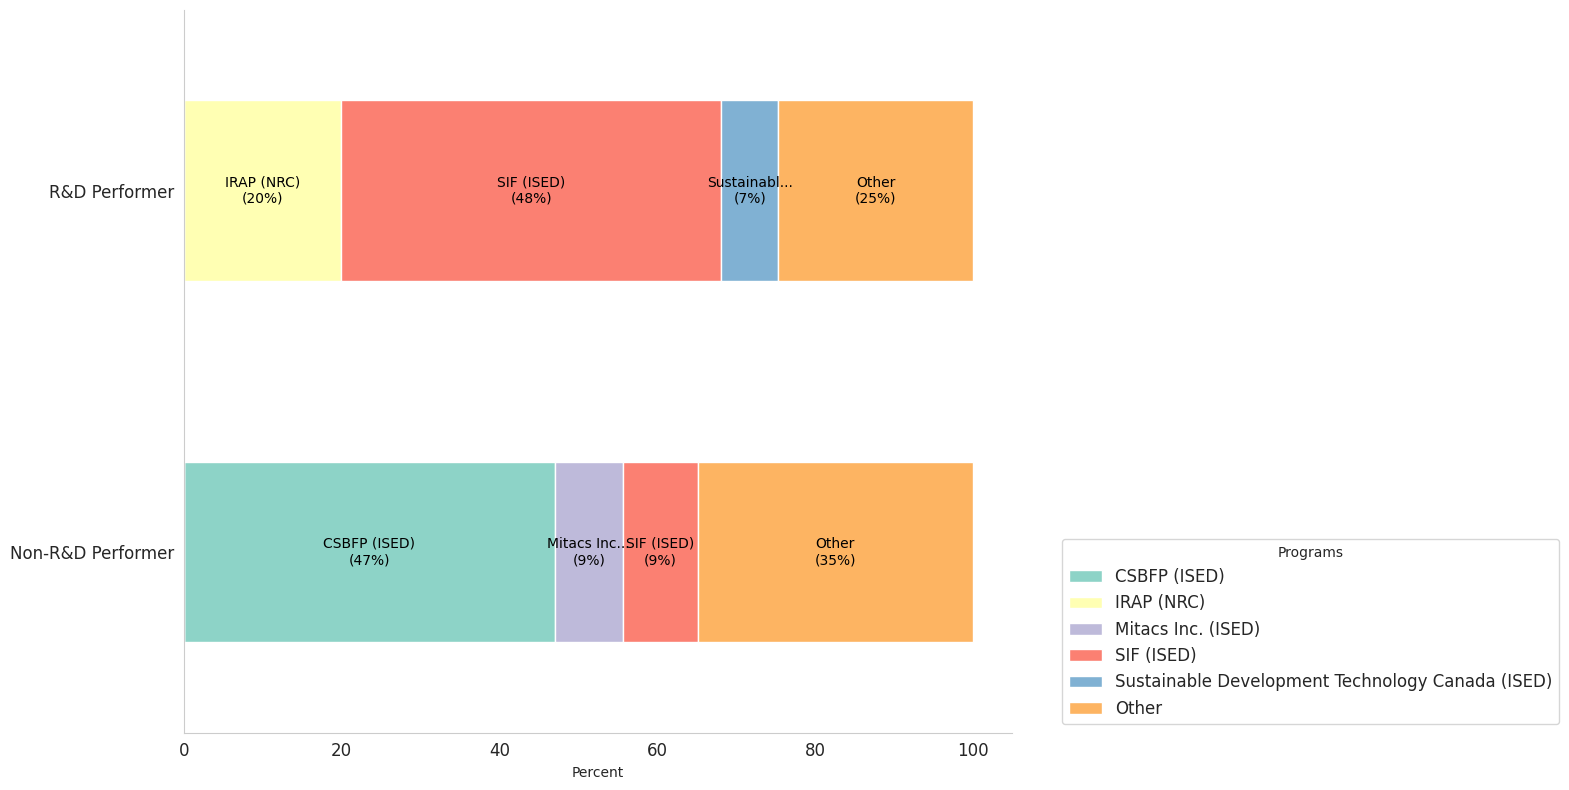

/tmp/ipython-input-3147031627.py:89: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3 = df_agg.groupby('type').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)


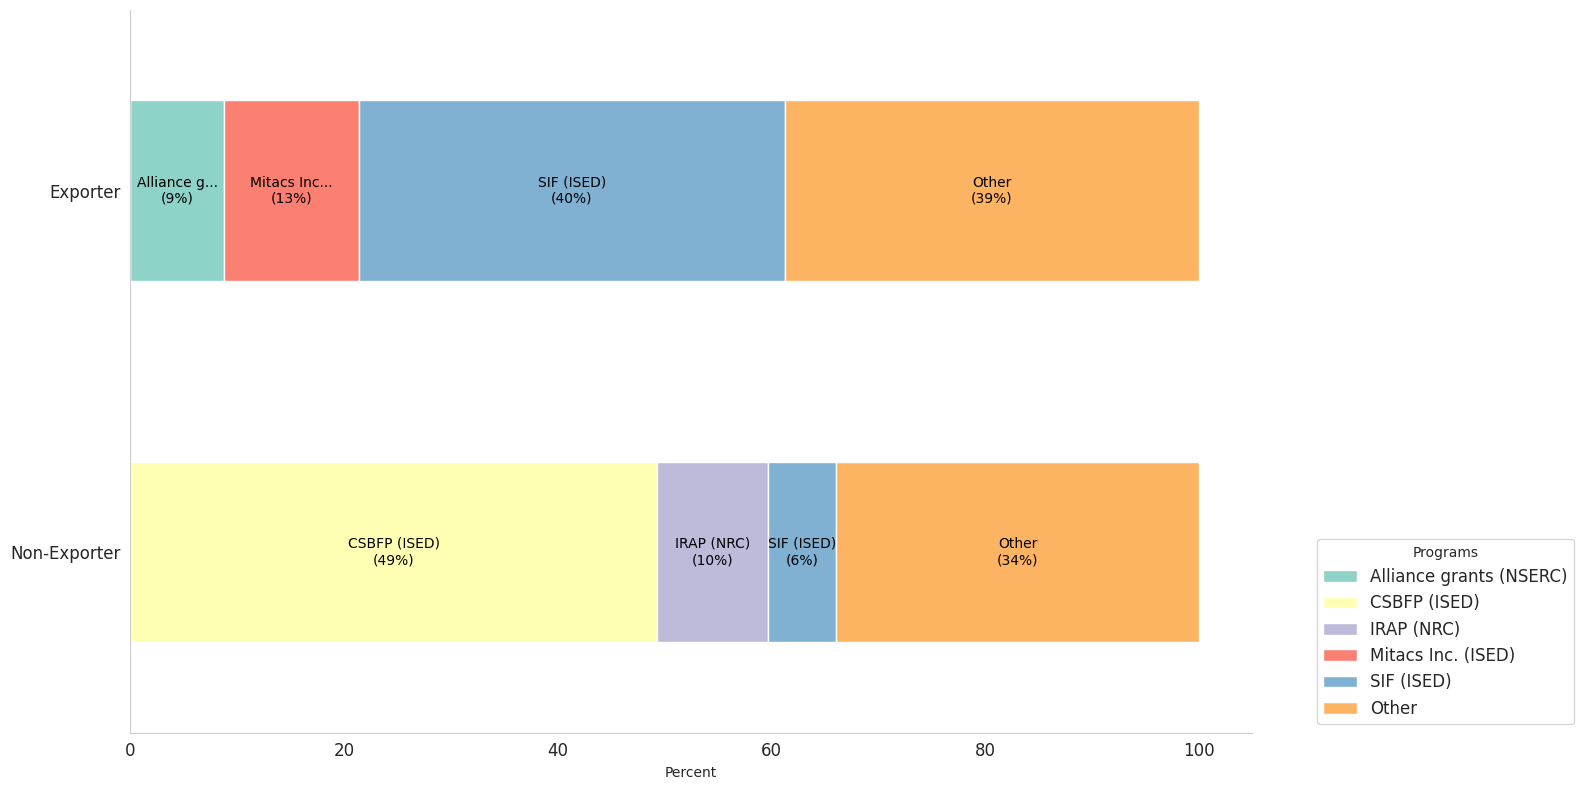

In [16]:
#@title Firm Characteristics
for key in ['rd', 'export']:
  df = dataframes_clean[key].copy()

  # total support value
  total = dataframes_total[key].copy()

  if key == 'age':
    df = df[df.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
    df.loc[df['type'].str.contains('less'), 'type'] = '< 1 year old'
    df.loc[df['type'].str.contains('More'), 'type'] = '> 20 years old'

    total = total[total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
    total.loc[total['type'].str.contains('less'), 'type'] = '< 1 year old'
    total.loc[total['type'].str.contains('More'), 'type'] = '> 20 years old'

    type_list = ['< 1 year old', '2-5 years old', '6-10 years old', '11-20 years old', '> 20 years old']
  elif key == 'emp':
    type_list = ['Large enterprises', 'Medium Enterprises', 'Small enterprises']
  elif key == 'rd':
    df.loc[df['type'].str.contains('R&D performer'), 'type'] = 'R&D Performer'
    df.loc[df['type'].str.contains('No R&D spending'), 'type'] = 'Non-R&D Performer'

    total.loc[total['type'].str.contains('R&D performer'), 'type'] = 'R&D Performer'
    total.loc[total['type'].str.contains('No R&D spending'), 'type'] = 'Non-R&D Performer'

    type_list = ['R&D Performer', 'Non-R&D Performer']
  elif key == 'export':
    df.loc[df['type'].str.contains('No export revenue'), 'type'] = 'Non-Exporter'
    total.loc[total['type'].str.contains('No export revenue'), 'type'] = 'Non-Exporter'
    type_list = ['Exporter', 'Non-Exporter']
  elif key == 'hg':
    df.loc[df['type'].str.contains('High-growth'), 'type'] = 'High-Growth'
    df.loc[df['type'].str.contains('Non high-growth'), 'type'] = 'Non-High-Growth'
    total.loc[total['type'].str.contains('High-growth'), 'type'] = 'High-Growth'
    total.loc[total['type'].str.contains('Non high-growth'), 'type'] = 'Non-High-Growth'
    type_list = ['High-Growth', 'Non-High-Growth']
  elif key == 'province':
    type_list = ['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories']
  elif key == 'industry':
    df.loc[df['type'].str.contains('All other industries'), 'type'] = 'Other'
    df.loc[df['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
    df.loc[df['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
    df.loc[df['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

    total = total[total.type.isin(['All other industries',
                          '54 - Professional, Scientific and Technical Services',
                          '44-45 - Wholesale and Retail Trade',
                          '31-33 - Manufacturing'])].copy()
    total.loc[total['type'].str.contains('All other industries'), 'type'] = 'Other'
    total.loc[total['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
    total.loc[total['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
    total.loc[total['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

    type_list = ['Manufacturing', 'Prof/Sci/Tech', 'Wholesale/Retail', 'Other']

  df = df[df.type.isin(type_list)].copy()
  total = total[total.type.isin(type_list)].copy()
  df = df.groupby(['program_select','type', 'year']).agg(
                                                    value = ('value', 'mean'),
                                                    num = ('num', 'mean'),
                                                    program = ('program', 'first')
                                                    ).reset_index()

  df['agency'] = [p.split(' - ')[0] for p in df.program]
  df['agency'] = [p.split('_')[0] for p in df.agency]
  df['programs'] = [p.split(' - ')[1] for p in df.program]
  df['program'] = df['programs'] + ' (' + df['agency'] + ')'

  # rename program labels
  df.loc[:, 'program'] = df['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contributions in support of', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contributions in Support of', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('Contribution to the', '', regex=False)
  df.loc[:, 'program'] = df['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)


  year = 2022
  df_year = df[df['year'] == year].copy()
  total_year = total[total['year'] == year].rename(columns={'value': 'total_support'})[['type','total_support']]

  # Aggregate data by type and program
  df_agg = df_year.groupby(['type', 'program']).agg(value=('value', 'sum')).reset_index()

  # Get the top 3 programs for each type
  df_top3 = df_agg.groupby('type').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)

  # Calculate the total support for each type
  df_total_by_type = df_agg.groupby('type').agg(total_value=('value', 'sum')).reset_index()

  # Calculate 'Other' value
  df_other = df_total_by_type.merge(df_top3.groupby('type').agg(top3_value=('value', 'sum')).reset_index(), on='type', how='left')
  df_other['other_value'] = df_other['total_value'] - df_other['top3_value'].fillna(0)
  df_other['other_value'] /= df_other['total_value']
  df_other = df_other[['type', 'other_value']]

  df_top3 = df_top3.merge(df_total_by_type, on='type', how='left')
  df_top3['value'] /= df_top3['total_value']

  # Prepare data for stacked bar chart
  df_top3_pivot = df_top3.pivot(index='type', columns='program', values='value').fillna(0)
  df_combined = df_top3_pivot.merge(df_other.set_index('type'), left_index=True, right_index=True, how='left')
  df_combined = df_combined.rename(columns={'other_value': 'Other'})

  # Reorder columns to put 'Other' at the end
  cols = [col for col in df_combined.columns if col != 'Other'] + ['Other']
  df_combined = df_combined[cols] * 100
  df_combined = df_combined.loc[type_list[::-1]]

  # Plotting
  fig, ax = plt.subplots(figsize=(16, 8))
  bars = df_combined.plot(kind='barh', stacked=True, ax=ax) # Changed to barh

  # Add program labels within each bar section
  for container in bars.containers:
      for i, bar in enumerate(container):
          width = bar.get_width()
          if width > 0: # Only label if the bar has a width
              x_position = bar.get_x() + width/2
              y_position = bar.get_y() + bar.get_height()/2
              program_name = container.get_label() # Get the program name from the container label
              # Abbreviate program name if longer than 15 characters
              if len(program_name) > 15:
                  abbreviated_name = program_name[:10] + '...'
              else:
                  abbreviated_name = program_name
              # Add abbreviated program name and value to the bar
              ax.text(x_position, y_position, f'{abbreviated_name}\n({width:,.0f}%)', ha='center', va='center', color='black', fontsize=10, wrap=True)

  # Add legend and labels
  # ax.set_title(f'{labels[key]} - {year}')
  ax.set_xlabel("Percent") # Swapped labels
  ax.set_ylabel("") # Swapped labels
  ax.legend(title='Programs', bbox_to_anchor=(1.05, 0), loc='lower left', fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  # Remove top and right spines
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.grid(False)
  plt.tight_layout()
  plt.savefig(f'{key}_by_top3_program.png', bbox_inches='tight')
  plt.show()

# Canada Small Business Financing Program, 2022

In [17]:
# @title Clean the DataFrames
for key in dataframes.keys():
# for key in ['support_type']:
  df = dataframes[key].copy()

  # value, num, and average value
  df['value'] = df['value'].replace('X', np.nan)
  df['value'] = df['value'].replace('x', np.nan)
  df['value'] = df['value'].replace('...', np.nan)
  df['value'] = df['value'].astype(str).str.replace(',', '').astype(float)
  df['value'] = df['value']/1e6

  df['num'] = df['num'].replace('X', np.nan)
  df['num'] = df['num'].replace('x', np.nan)
  df['num'] = df['num'].astype(str).str.replace(",", "").astype(float)

  df['avg_value'] = df['value']/df['num'] * 1e3

  # remove special characters
  df['program']     = df['program'].astype(str).str.replace("\n", " ")
  df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
  df['type']        = df['type'].astype(str).str.replace("\n", " ")

  ## create a dataframe capturing TOTAL SUPPORT by type
  df2 = df[df['program_id'].isin(['TOTAL'])]

  # Drop aggregated value to avoid double-counting
  df2 = df2[df2['value_level'].str.contains('Total')]
  df2.drop(columns='value_level', inplace=True)

  dataframes_total[key] = df2

  ## create a dataframe capturing ISED's TOTAL SUPPORT by type
  df3 = df[df['program_id'].isin(['ISED_ISDE'])]

  # Drop aggregated value to avoid double-counting
  df3 = df3[df3['value_level'].str.contains('Total')]
  df3.drop(columns='value_level', inplace=True)

  dataframes_ised[key] = df3

  # create a dataframe caputring support by programs
  # Identify all the programs and drop the disaggregated observations to avoid suppressed values
  # here I manually include IRAP, Non IRAP programs
  df = df[  (df['program_id'].str.contains('Total') ) |
            (df['program_id'].str.contains('_00') ) |
            (df['program_id'].str.contains('IRAP') )
        ]

  # drop all the subprograms of NRC expect for IRAP and NONIRAP
  df = df[  ~((df['program'].str.contains('NRC_CNRC')) & ~(df['program_id'].str.contains('IRAP') )) ]

  df['program_id'] = df['program_id'].str.replace("_00", '')
  df['program_id'] = df['program_id'].str.replace("(Total)", '')
  df['program_id'] = df['program_id'].str.strip()

  df['program'] = df['program'].str.replace("(Total)", '')
  df['program'] = df['program'].str.strip()

  # Drop aggregated value to avoid double-counting
  df = df[df['value_level'].str.contains('Total')]
  df.drop(columns='value_level', inplace=True)

  # Drop duplicates where both '_00' and 'Total' are reported
  df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

  # Select Programs
  df['program_select'] = df['program']
  df.loc[df['program'].str.contains('Canada Small Business Financing Program', na=False ), 'program_select'] = 'CSBFP (ISED)'
  df.loc[df['program'].str.contains('Strategic Innovation Fund', na=False ), 'program_select'] = 'SIF (ISED)'
  df.loc[df['program_id'].str.match('IRAP', na=False ), 'program_select'] = 'IRAP (NRC)'
  df.loc[df['program'].str.contains('Alliance grant', na=False ), 'program_select'] = 'Alliance Grant (NSERC)'
  df.loc[df['program'].str.contains('Mitacs', na=False ), 'program_select'] = 'Mitacs (ISED)'
  df.loc[df['program'].str.contains('Innovation Superclusters Initiative', na=False ), 'program_select'] = 'GIC (ISED)'
  df.loc[df['program'].str.contains('Regional Economic', na=False ), 'program_select'] = 'RDAs (Regional Economics Growth Through Innovation)'
  dataframes_clean[key] = df

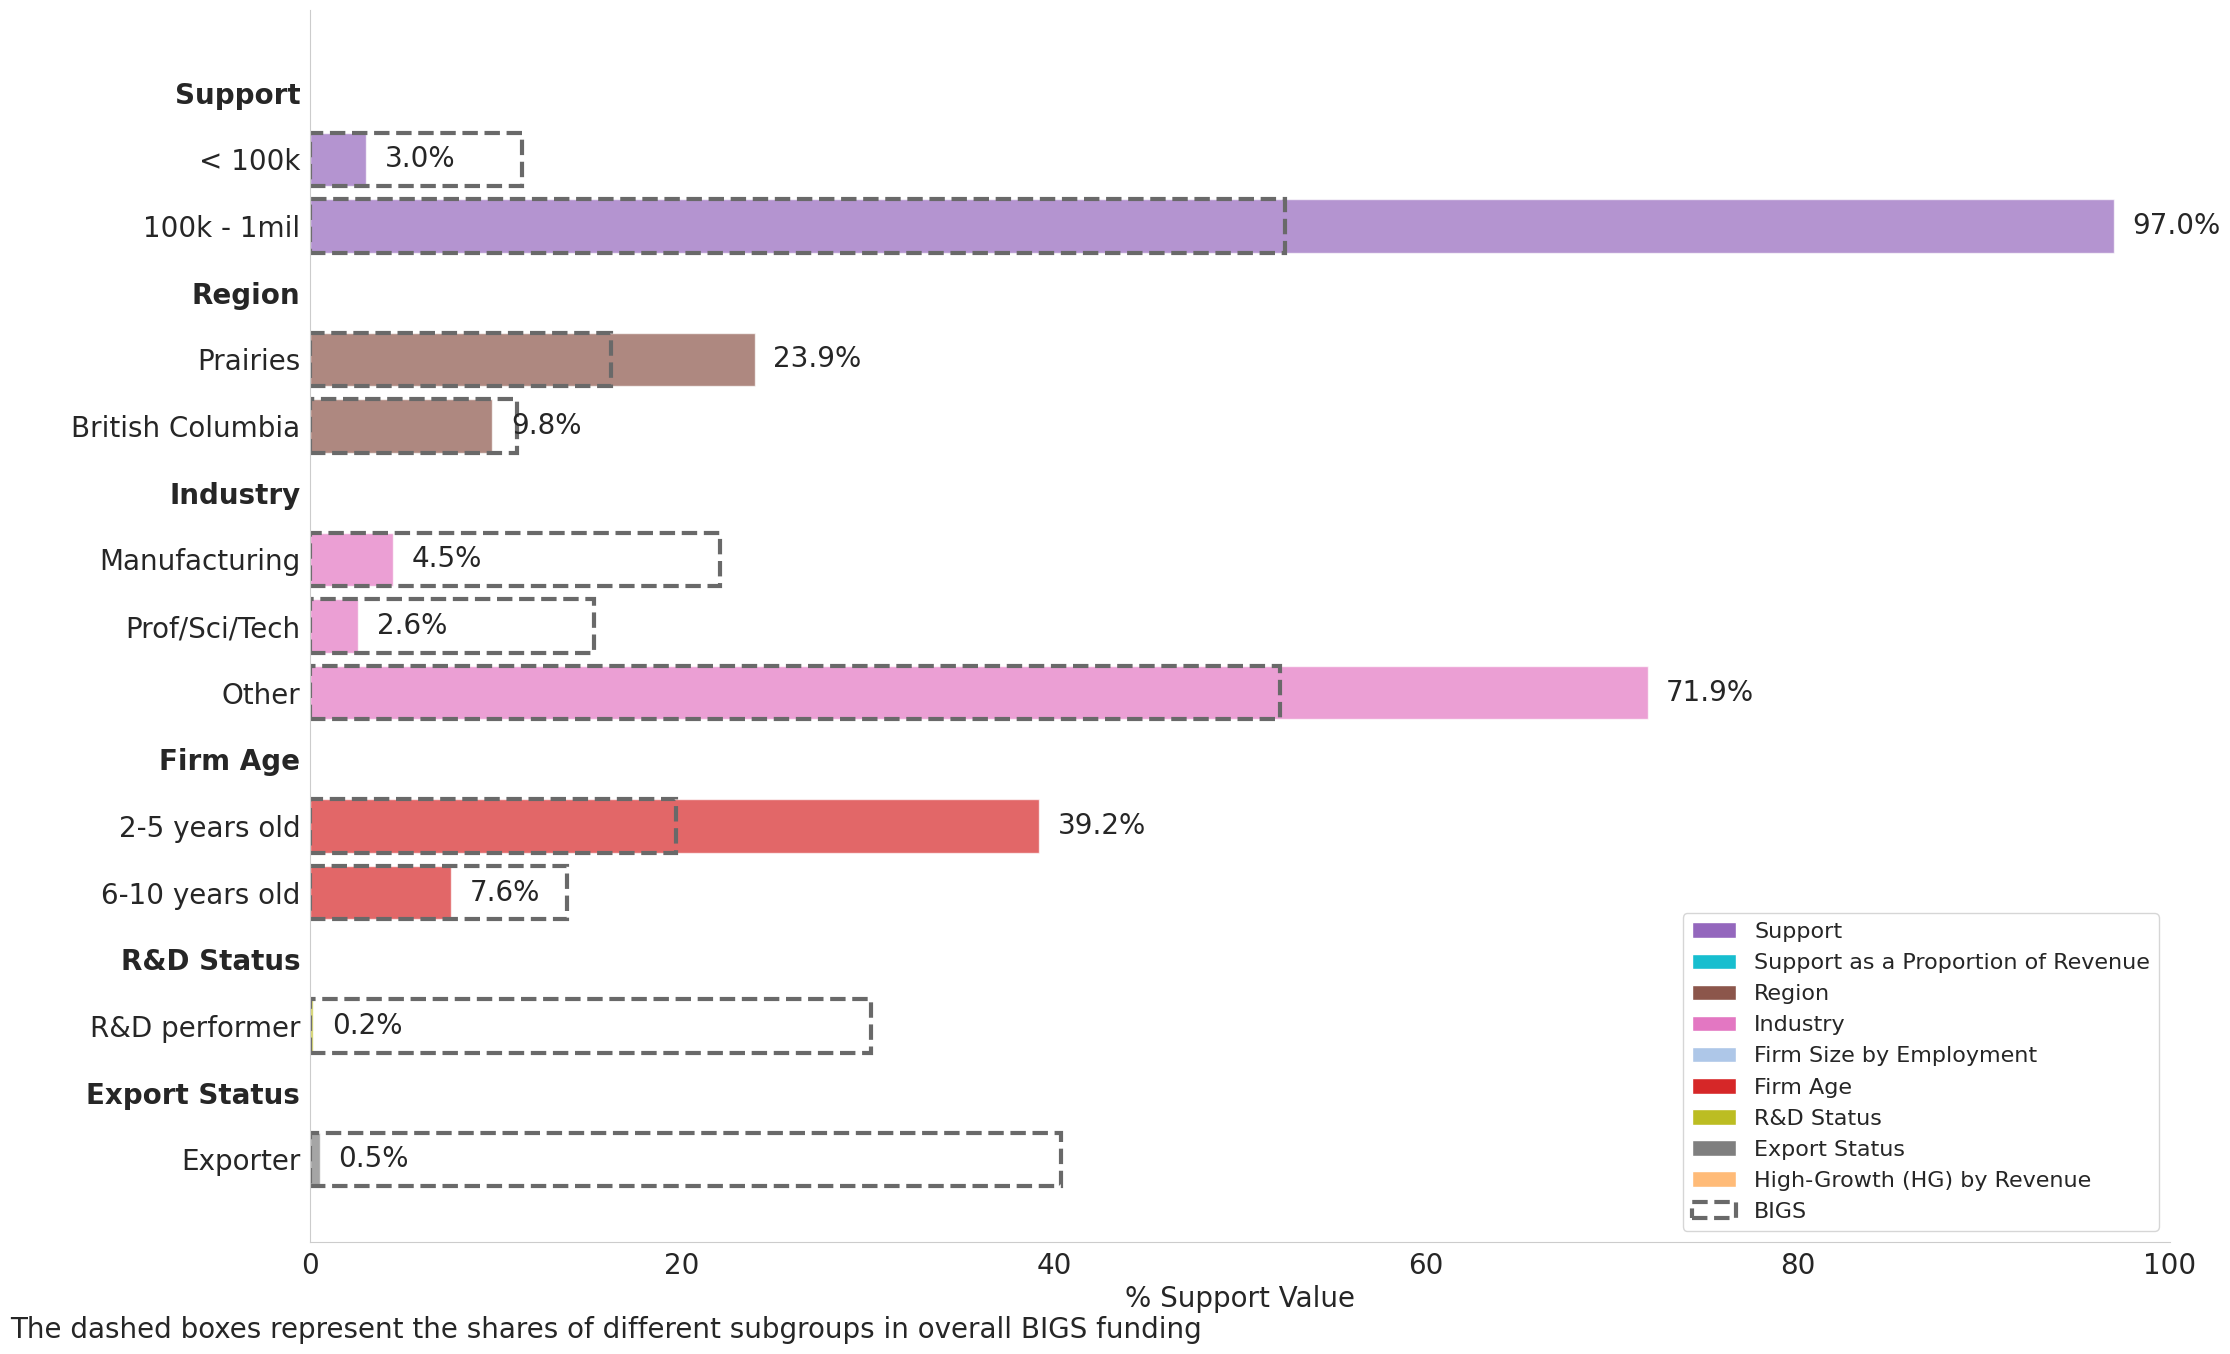

In [18]:
# @title CSBFP
def bargraph_labelling(df, df_total):
  df['percentage'] = df[outcome] / total * 100

  df_total = df_total.groupby('type').agg(total_value=(outcome, 'sum'))
  df_total['percentage'] = df_total['total_value'] / total_value * 100

  df = df.dropna(subset=[outcome])
  bars = ax.barh(df['type'], df['percentage'], color = color_mapping[key], alpha=0.7, label=labels[key])
  for bar, pct in zip(bars, df['percentage']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%', va='center', fontsize = 20)

  # add the category's name to the figure
  gap_df = pd.DataFrame([{'type': labels[key],
                          'percentage': 0}])

  df_total = df_total[df_total.index.isin(df['type'])]
  ax.barh(df_total.index, df_total['percentage'], facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3)
  ax.barh(gap_df['type'], gap_df['percentage'])

  # dataframe to excel
  with pd.ExcelWriter(f"{program}_{outcome}_2022.xlsx", engine='openpyxl') as writer:
    start_row = 0
    df[['type', 'value', 'percentage']].to_excel(writer, sheet_name=key, startrow = start_row, index=False)
    start_row += len(df) + 2
    df_total[['total_value', 'percentage']].to_excel(writer, sheet_name=key, startrow = start_row, index=True)

# loop over heterogeneity variables
for program in ['CSBFP (ISED)']:
  for outcome in ['value']:
    fig, ax = plt.subplots(figsize=(24, 16))

    # compute the total value and total count before dropping any categories
    df_main = dataframes_clean['support_type'].copy()
    total = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022) & (df_main['type'] == 'Total')]
    total = total[outcome].sum()

    df_total = dataframes_total['support_type'].copy()
    df_total = df_total[(df_total['year'] == 2022) & (df_total['type'] == 'Total')]
    total_value = df_total[outcome].values[0]


    category_list = ['support_intensity', 'province', 'industry', 'emp', 'age', 'rd', 'export']
    for key in category_list[::-1]:
      #subsample
      df_main = dataframes_clean[key]
      df_main = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022)]

      #total values
      df_total = dataframes_total[key].copy()
      df_total = df_total[df_total['year'] == 2022]

      if key == "support_type":
        continue
      elif key == "enterprise_type":
        continue
      elif key == "age":
        df = df_main[df_main.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        df_total = df_total[df_total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        bargraph_labelling(df, df_total)
      elif key == "support_intensity":
        df = df_main[~df_main.type.isin(['Total'])].copy()

        df.loc[df['type'].str.contains('less than'), 'type'] = '< 100k'
        df.loc[df['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df.loc[df['type'].str.contains('more than'), 'type'] = '> 1mil'

        df_total = df_total[~df_total.type.isin(['Total'])].copy()
        df_total.loc[df_total['type'].str.contains('less than'), 'type'] = '< 100k'
        df_total.loc[df_total['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df_total.loc[df_total['type'].str.contains('more than'), 'type'] = '> 1mil'

        bargraph_labelling(df, df_total)
      elif key == "province":
        df = df_main[df_main.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        df_total = df_total[df_total.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        bargraph_labelling(df, df_total)
      elif key == "industry":
        df = df_main[df_main.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df.loc[df['type'].str.contains('All other industries'), 'type'] = 'Other'
        df.loc[df['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df.loc[df['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df.loc[df['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

        df_total = df_total[df_total.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df_total.loc[df_total['type'].str.contains('All other industries'), 'type'] = 'Other'
        df_total.loc[df_total['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df_total.loc[df_total['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df_total.loc[df_total['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'
        bargraph_labelling(df, df_total)
      elif key == "export":
        df = df_main[df_main.type.isin(['Exporter'])].copy()
        df_total = df_total[df_total.type.isin(['Exporter'])].copy()
        bargraph_labelling(df, df_total)
      elif key == "rd":
        df = df_main[df_main.type.isin(['R&D performer'])].copy()
        df_total = df_total[df_total.type.isin(['R&D performer'])].copy()
        bargraph_labelling(df, df_total)
      elif key == "support_rev":
        df = df_main[df_main.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df.loc[df['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df.loc[df['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df.loc[df['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df.loc[df['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
        df_total = df_total[df_total.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df_total.loc[df_total['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df_total.loc[df_total['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df_total.loc[df_total['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df_total.loc[df_total['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'

        bargraph_labelling(df, df_total)
      elif key == "emp":
        continue
      elif key == "hg":
        df2 = df_main[df_main.type.isin(['Total'])].copy()
        df = df_main[df_main.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df.loc[df['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        df_total = df_total[df_total.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df_total.loc[df_total['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        bargraph_labelling(df, df_total)
      else:
        continue

    # Create legend handles using consistent colors and labels
    legend_handles = [
        Patch(facecolor=color_mapping[key], label=labels[key])
        for key in custom_category_order if key in labels and key in color_mapping
    ]
    extra_handle = Patch(facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3, label='BIGS')
    legend_handles.append(extra_handle)
    plt.legend(loc='lower right', handles=legend_handles, fontsize = 16)

    # formatting y-axis
    yticks      = ax.get_yticks()
    yticklabels = ax.get_yticklabels()

    # Set bold font for specific categories
    for label in yticklabels:
        if label.get_text() in labels.values():
            label.set_fontweight('bold')

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlabel(outcome_label2[outcome], fontsize=20)
    plt.xlim(0, 100)
    plt.grid(False)
    plt.figtext(0, 0.05, "The dashed boxes represent the shares of different subgroups in overall BIGS funding", ma='left', fontsize=20)
    plt.savefig(f'{program}_{outcome}_share_2022.png', bbox_inches='tight')
    plt.show()

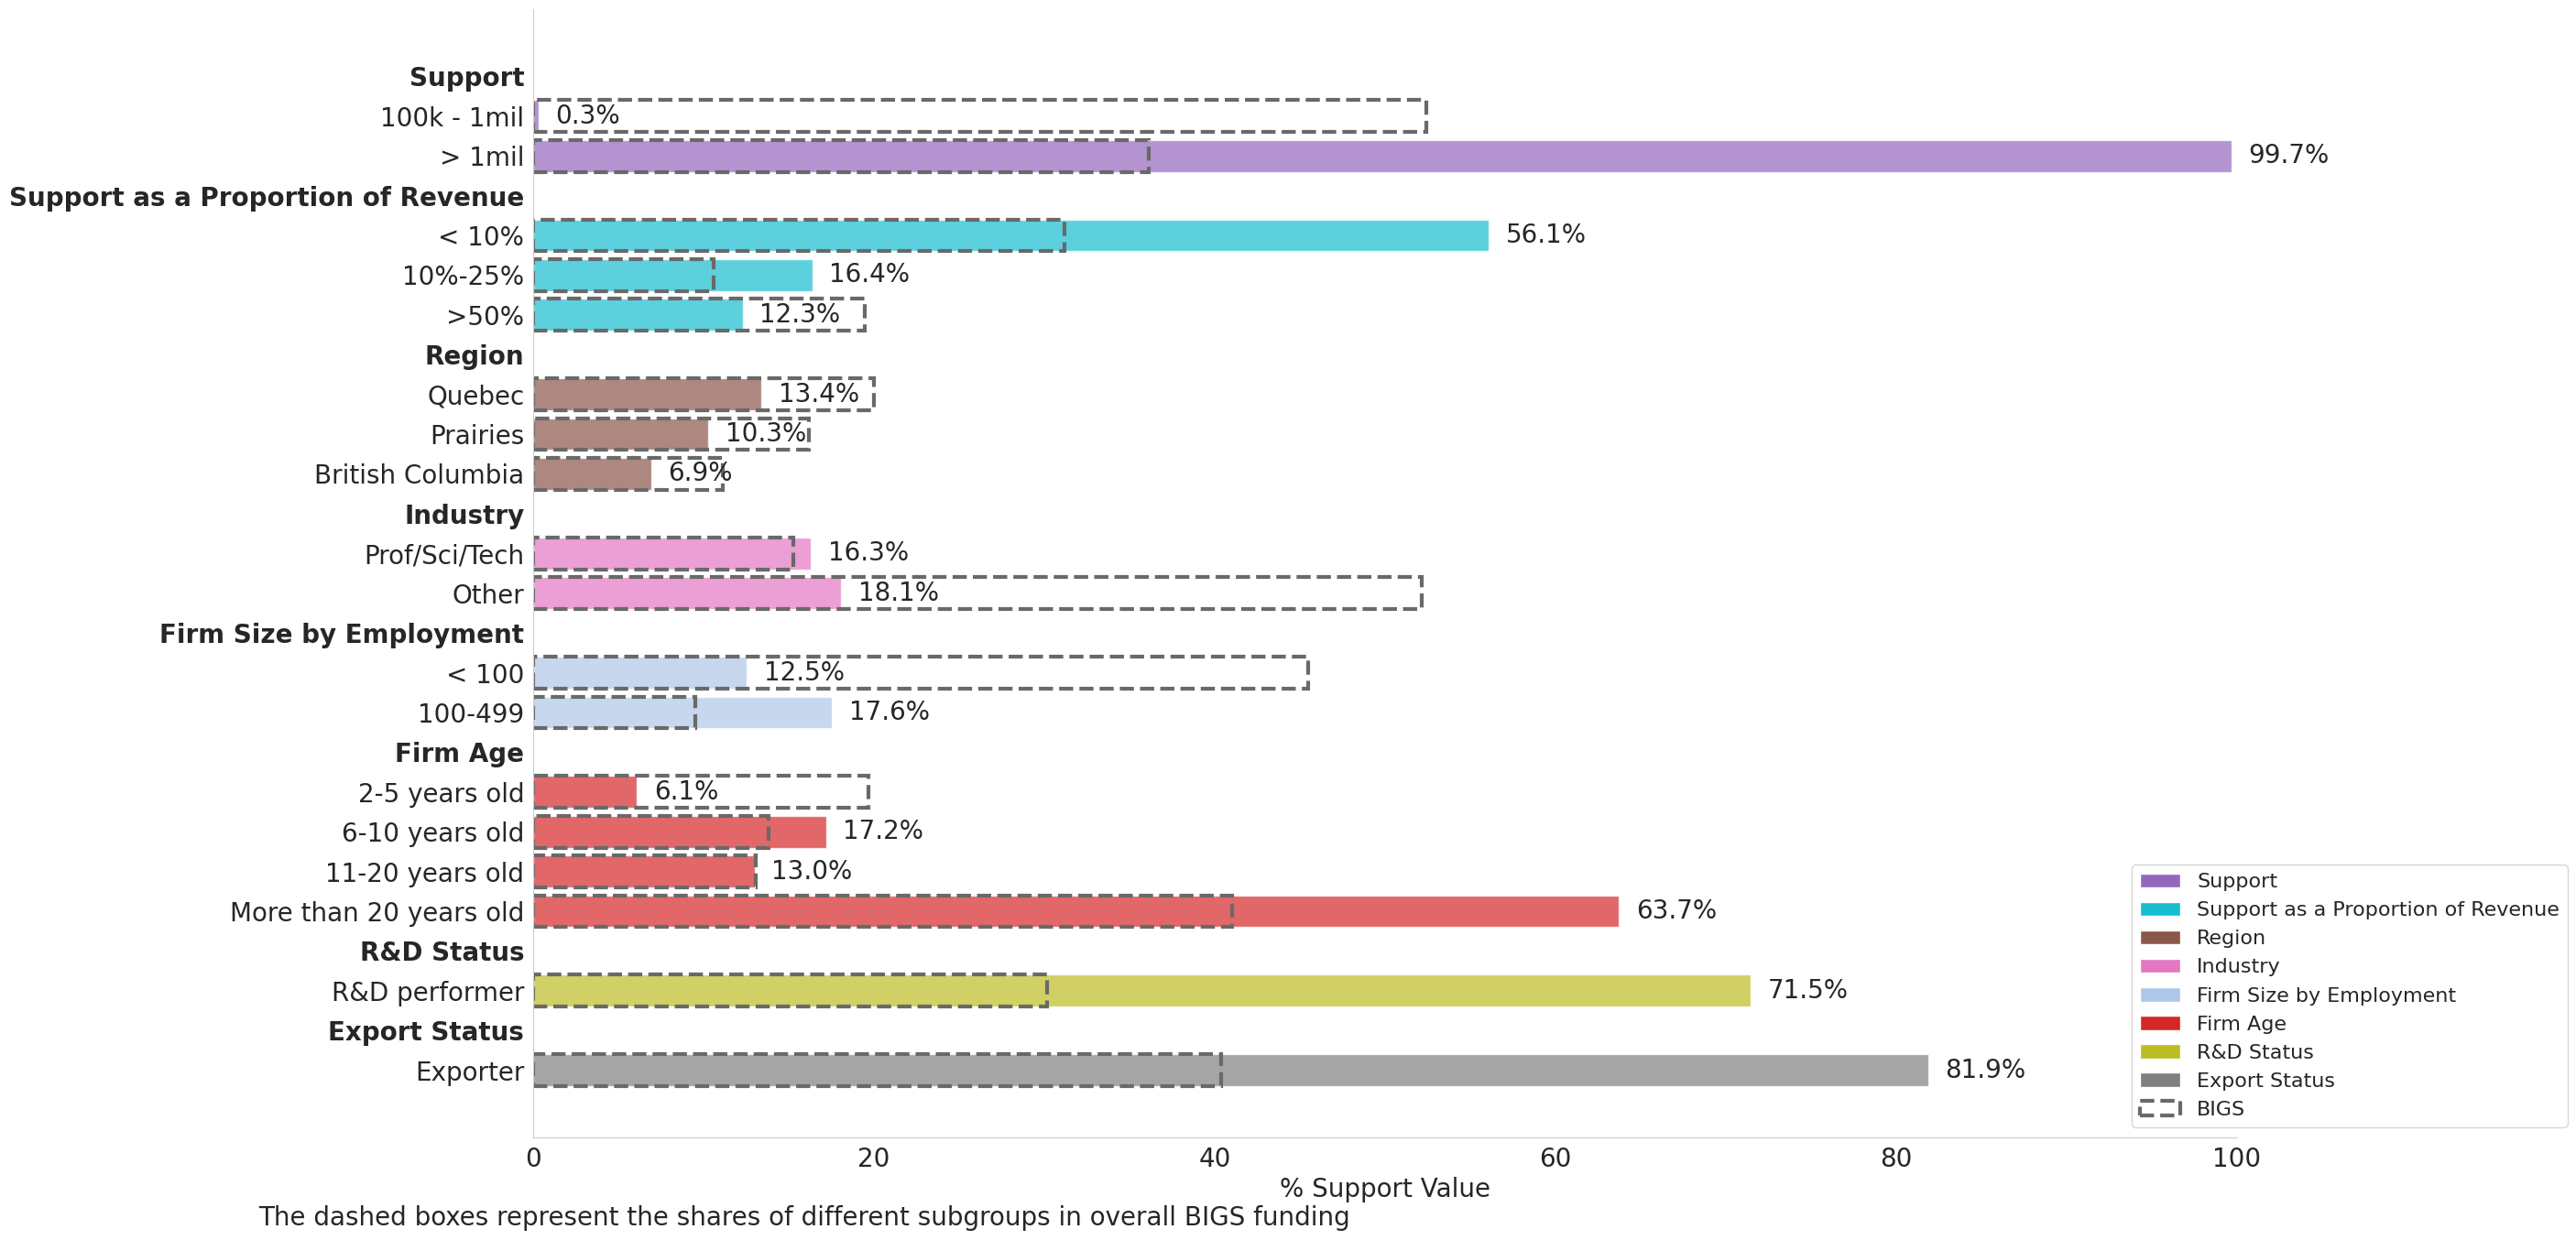

In [19]:
# @title SIF
def bargraph_labelling(df, df_total):
  df['percentage'] = df[outcome] / total * 100

  df_total = df_total.groupby('type').agg(total_value=(outcome, 'sum'))
  df_total['percentage'] = df_total['total_value'] / total_value * 100

  df = df.dropna(subset=[outcome])
  bars = ax.barh(df['type'], df['percentage'], color = color_mapping[key], alpha=0.7, label=labels[key])
  for bar, pct in zip(bars, df['percentage']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%', va='center', fontsize = 20)

  # add the category's name to the figure
  gap_df = pd.DataFrame([{'type': labels[key],
                          'percentage': 0}])

  df_total = df_total[df_total.index.isin(df['type'])]
  ax.barh(df_total.index, df_total['percentage'], facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3)
  ax.barh(gap_df['type'], gap_df['percentage'])

  # dataframe to excel
  with pd.ExcelWriter(f"{program}_{outcome}_2022.xlsx", engine='openpyxl') as writer:
    start_row = 0
    df[['type', 'value', 'percentage']].to_excel(writer, sheet_name=key, startrow = start_row, index=False)
    start_row += len(df) + 2
    df_total[['total_value', 'percentage']].to_excel(writer, sheet_name=key, startrow = start_row, index=True)

# loop over heterogeneity variables
for program in ['SIF (ISED)']:
  for outcome in ['value']:
    fig, ax = plt.subplots(figsize=(24, 16))

    # compute the total value and total count before dropping any categories
    df_main = dataframes_clean['support_type'].copy()
    total = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022) & (df_main['type'] == 'Total')]
    total = total[outcome].sum()

    df_total = dataframes_total['support_type'].copy()
    df_total = df_total[(df_total['year'] == 2022) & (df_total['type'] == 'Total')]
    total_value = df_total[outcome].values[0]

    category_list = ['support_intensity', 'support_rev', 'province', 'industry', 'emp', 'age', 'rd', 'export']
    for key in category_list[::-1]:
      #subsample
      df_main = dataframes_clean[key].copy()
      df_main = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022)]

      #total values
      df_total = dataframes_total[key].copy()
      df_total = df_total[df_total['year'] == 2022]

      if key == "support_type":
        continue
      if key == "enterprise_type":
        continue
      if key == "age":
        df = df_main[df_main.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        df_total = df_total[df_total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        bargraph_labelling(df, df_total)
      if key == "support_intensity":
        df = df_main[~df_main.type.isin(['Total'])].copy()
        df.loc[df['type'].str.contains('less than'), 'type'] = '< 100k'
        df.loc[df['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df.loc[df['type'].str.contains('more than'), 'type'] = '> 1mil'

        df_total = df_total[~df_total.type.isin(['Total'])].copy()
        df_total.loc[df_total['type'].str.contains('less than'), 'type'] = '< 100k'
        df_total.loc[df_total['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df_total.loc[df_total['type'].str.contains('more than'), 'type'] = '> 1mil'

        bargraph_labelling(df, df_total)
      if key == "province":
        df = df_main[df_main.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        df_total = df_total[df_total.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        bargraph_labelling(df, df_total)
      if key == "industry":
        df = df_main[df_main.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df.loc[df['type'].str.contains('All other industries'), 'type'] = 'Other'
        df.loc[df['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df.loc[df['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df.loc[df['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

        df_total = df_total[df_total.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df_total.loc[df_total['type'].str.contains('All other industries'), 'type'] = 'Other'
        df_total.loc[df_total['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df_total.loc[df_total['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df_total.loc[df_total['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'


        bargraph_labelling(df, df_total)
      if key == "export":
        df = df_main[df_main.type.isin(['Exporter'])].copy()
        df_total = df_total[df_total.type.isin(['Exporter'])].copy()
        bargraph_labelling(df, df_total)
      if key == "rd":
        df = df_main[df_main.type.isin(['R&D performer'])].copy()
        df_total = df_total[df_total.type.isin(['R&D performer'])].copy()
        bargraph_labelling(df, df_total)
      if key == "support_rev":
        df = df_main[df_main.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df.loc[df['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df.loc[df['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df.loc[df['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df.loc[df['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
        df_total = df_total[df_total.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df_total.loc[df_total['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df_total.loc[df_total['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df_total.loc[df_total['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df_total.loc[df_total['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'

        bargraph_labelling(df, df_total)
      if key == "emp":
        df = df_main[df_main.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df.loc[df['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df.loc[df['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df.loc[df['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        df_total = df_total[df_total.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df_total.loc[df_total['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df_total.loc[df_total['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df_total.loc[df_total['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        bargraph_labelling(df, df_total)
      if key == "hg":
        df2 = df_main[df_main.type.isin(['Total'])].copy()
        df = df_main[df_main.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df.loc[df['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        df_total = df_total[df_total.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df_total.loc[df_total['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        bargraph_labelling(df, df_total)
      else:
        continue

    # Create legend handles using consistent colors and labels
    legend_handles = [
        Patch(facecolor=color_mapping[key], label=labels[key])
        for key in category_list if key in labels and key in color_mapping
    ]
    extra_handle = Patch(facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3, label='BIGS')
    legend_handles.append(extra_handle)
    plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0), handles=legend_handles, fontsize = 16)

    # formatting y-axis
    yticks      = ax.get_yticks()
    yticklabels = ax.get_yticklabels()

    # Set bold font for specific categories
    for label in yticklabels:
        if label.get_text() in labels.values():
            label.set_fontweight('bold')

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.xlabel(outcome_label2[outcome], fontsize=20)
    plt.xlim(0, 100)
    plt.grid(False)
    plt.figtext(0, 0.05, "The dashed boxes represent the shares of different subgroups in overall BIGS funding", ma='left', fontsize=20)
    plt.savefig(f'{program}_{outcome}_share_2022.png', bbox_inches='tight')
    plt.show()

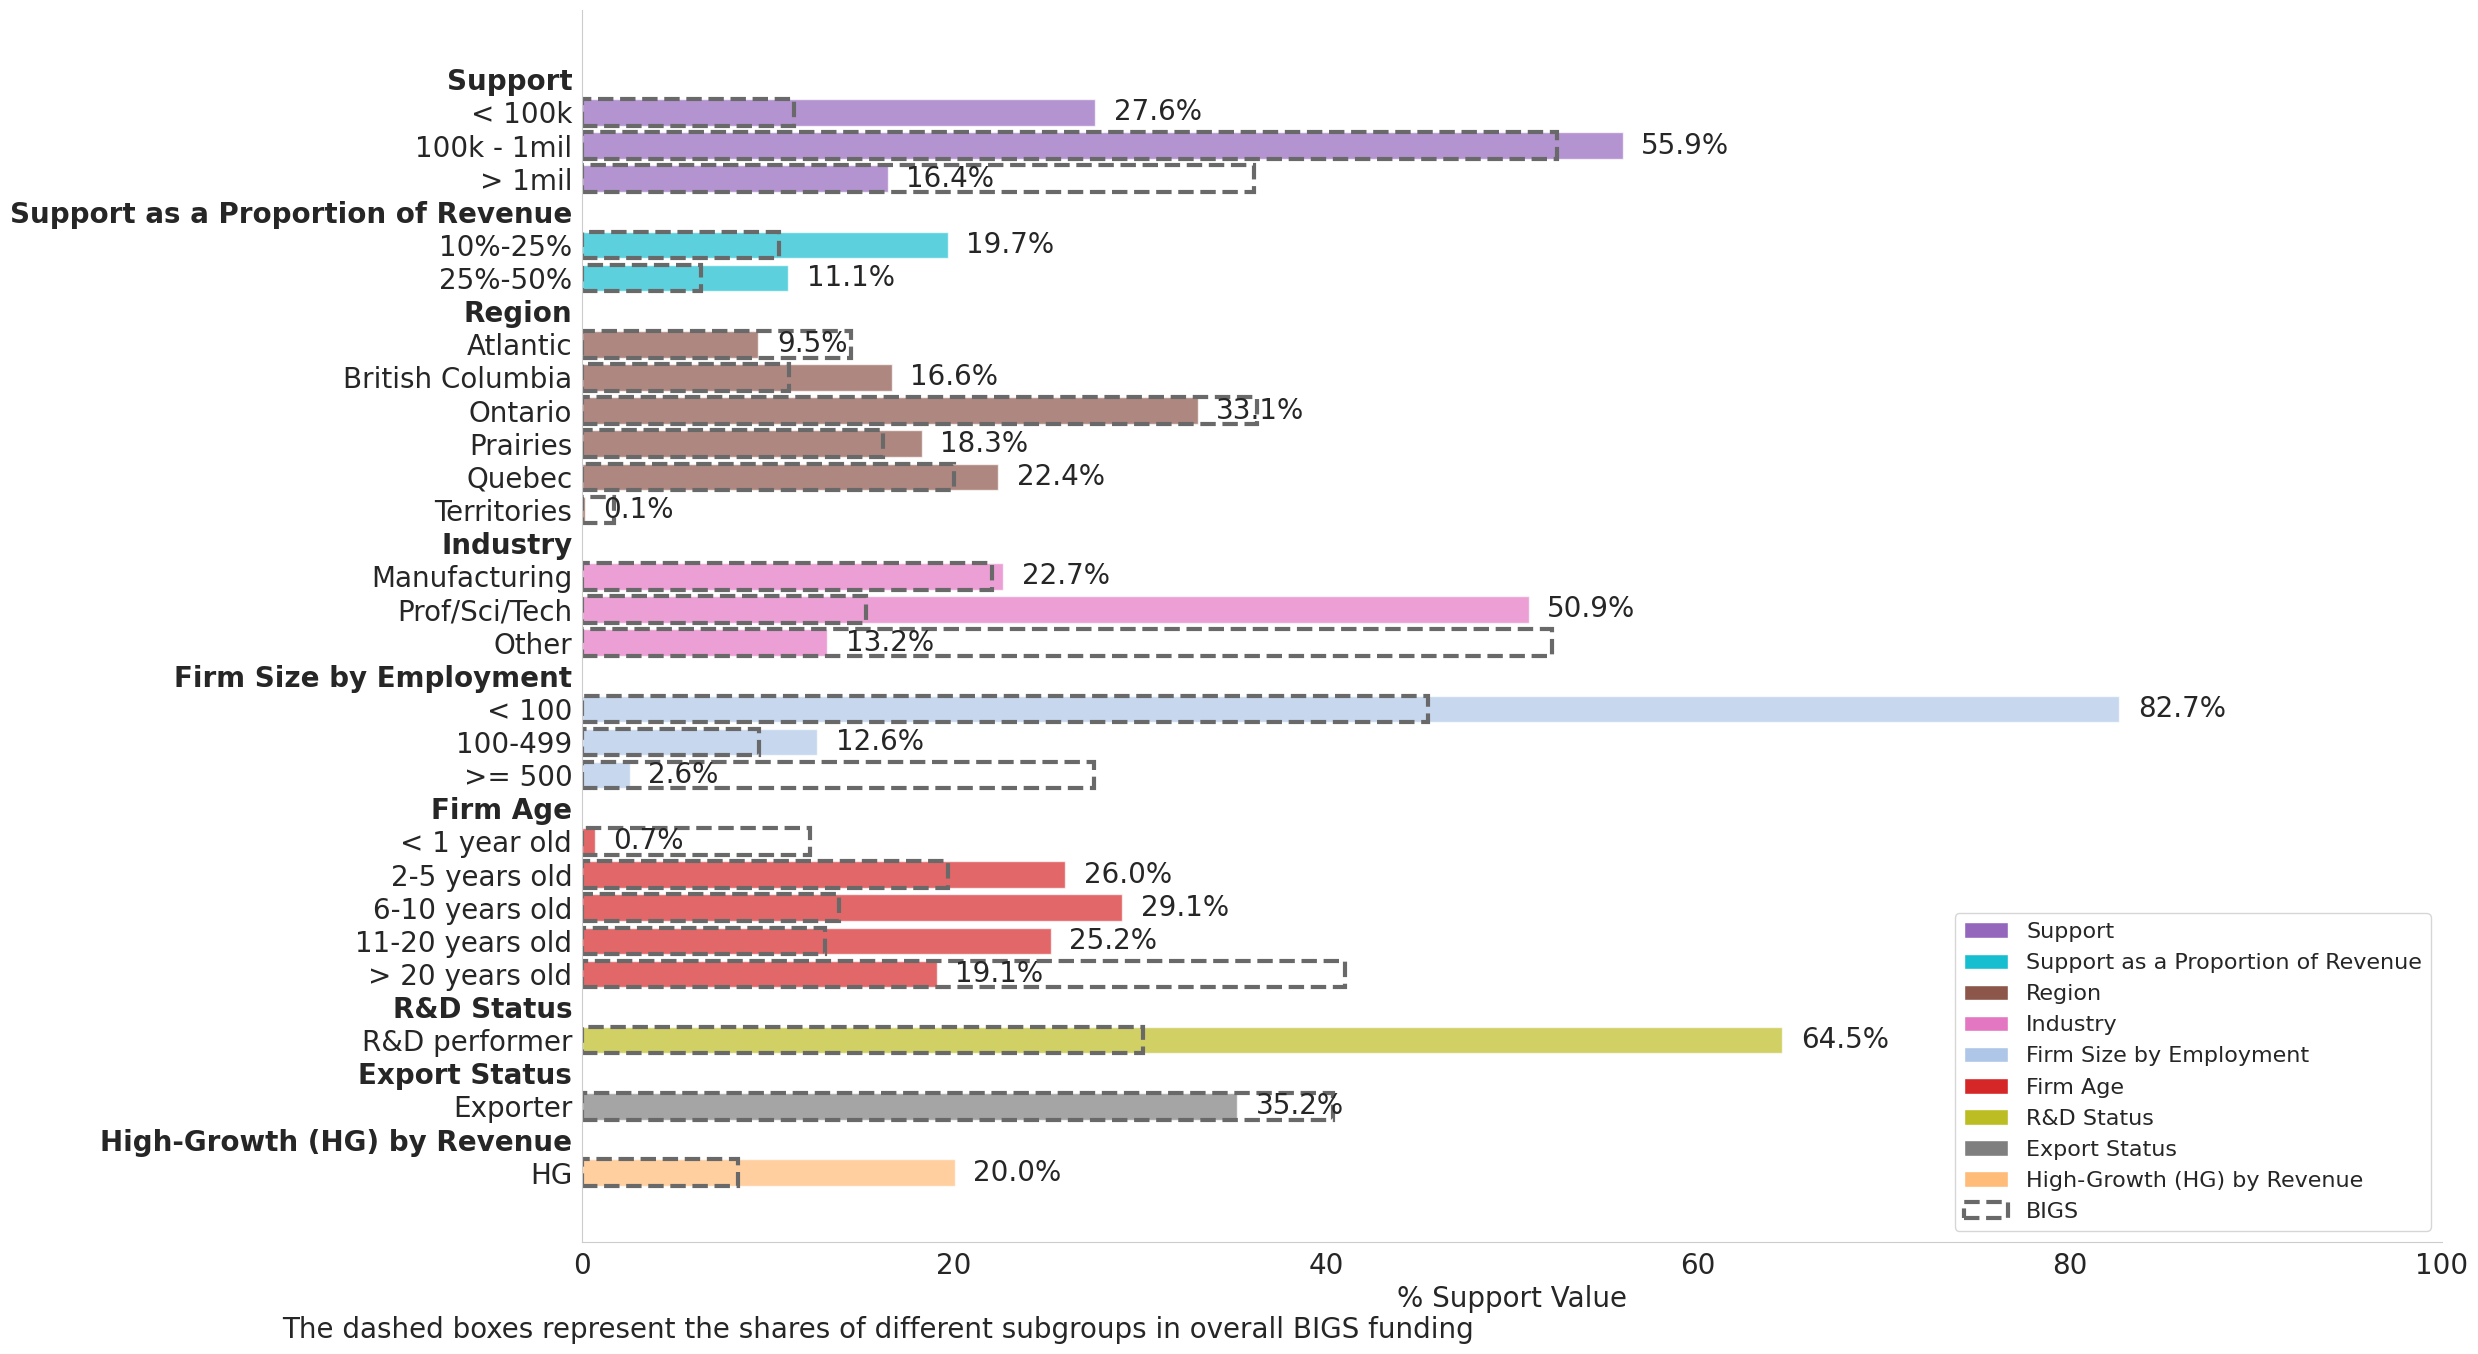

In [20]:
# @title IRAP
def bargraph_labelling(df, df_total):
  df['percentage'] = df[outcome] / total * 100

  df_total = df_total.groupby('type').agg(total_value=(outcome, 'sum'))
  df_total['percentage'] = df_total['total_value'] / total_value * 100

  df = df.dropna(subset=[outcome])
  bars = ax.barh(df['type'], df['percentage'], color = color_mapping[key], alpha=0.7, label=labels[key])
  for bar, pct in zip(bars, df['percentage']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%', va='center', fontsize = 20)

  # add the category's name to the figure
  gap_df = pd.DataFrame([{'type': labels[key],
                          'percentage': 0}])

  df_total = df_total[df_total.index.isin(df['type'])]
  ax.barh(df_total.index, df_total['percentage'], facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3)
  ax.barh(gap_df['type'], gap_df['percentage'])

#global variable
year = 2022
# loop over heterogeneity variables
for program in ['IRAP (NRC)']:
  for outcome in ['value']:
    fig, ax = plt.subplots(figsize=(24, 16))

    # compute the total value and total count before dropping any categories
    df_main = dataframes_clean['support_type'].copy()
    total = df_main[(df_main['program_select'] == program) & (df_main['year'] == year) & (df_main['type'] == 'Total')]
    total = total[outcome].sum()

    df_total = dataframes_total['support_type'].copy()
    df_total = df_total[(df_total['year'] == year) & (df_total['type'] == 'Total')]
    total_value = df_total[outcome].values[0]

    category_list = ['support_intensity', 'support_rev', 'province', 'industry', 'emp', 'age', 'rd', 'export', 'hg']
    for key in category_list[::-1]:
      #subsample
      df_main = dataframes_clean[key].copy()
      df_main = df_main[(df_main['program_select'] == program) & (df_main['year'] == year)]

      #total values
      df_total = dataframes_total[key].copy()
      df_total = df_total[df_total['year'] == year]

      if key == "support_type":
        continue
      if key == "enterprise_type":
        continue
      if key == "age":
        df = df_main[df_main.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        df.loc[df['type'].str.contains('less'), 'type'] = '< 1 year old'
        df.loc[df['type'].str.contains('More'), 'type'] = '> 20 years old'

        df_total = df_total[df_total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        df_total.loc[df_total['type'].str.contains('less'), 'type'] = '< 1 year old'
        df_total.loc[df_total['type'].str.contains('More'), 'type'] = '> 20 years old'

        bargraph_labelling(df, df_total)
      if key == "support_intensity":
        df = df_main[~df_main.type.isin(['Total'])].copy()
        df.loc[df['type'].str.contains('less than'), 'type'] = '< 100k'
        df.loc[df['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df.loc[df['type'].str.contains('more than'), 'type'] = '> 1mil'

        df_total = df_total[~df_total.type.isin(['Total'])].copy()
        df_total.loc[df_total['type'].str.contains('less than'), 'type'] = '< 100k'
        df_total.loc[df_total['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df_total.loc[df_total['type'].str.contains('more than'), 'type'] = '> 1mil'

        bargraph_labelling(df, df_total)
      if key == "province":
        df = df_main[df_main.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        df.sort_values(by='type', inplace=True, ascending=False)

        df_total = df_total[df_total.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        bargraph_labelling(df, df_total)
      if key == "industry":
        df = df_main[df_main.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df.loc[df['type'].str.contains('All other industries'), 'type'] = 'Other'
        df.loc[df['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df.loc[df['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df.loc[df['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

        df_total = df_total[df_total.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df_total.loc[df_total['type'].str.contains('All other industries'), 'type'] = 'Other'
        df_total.loc[df_total['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df_total.loc[df_total['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df_total.loc[df_total['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'


        bargraph_labelling(df, df_total)
      if key == "export":
        df = df_main[df_main.type.isin(['Exporter'])].copy()
        df_total = df_total[df_total.type.isin(['Exporter'])].copy()
        bargraph_labelling(df, df_total)
      if key == "rd":
        df = df_main[df_main.type.isin(['R&D performer'])].copy()
        df_total = df_total[df_total.type.isin(['R&D performer'])].copy()
        bargraph_labelling(df, df_total)
      if key == "support_rev":
        df = df_main[df_main.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df.loc[df['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df.loc[df['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df.loc[df['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df.loc[df['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
        df_total = df_total[df_total.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df_total.loc[df_total['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df_total.loc[df_total['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df_total.loc[df_total['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df_total.loc[df_total['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'

        bargraph_labelling(df, df_total)
      if key == "emp":
        df = df_main[df_main.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df.loc[df['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df.loc[df['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df.loc[df['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        df.loc[df.type == '< 100', 'rnk'] = 1
        df.loc[df.type == '100-499', 'rnk'] = 2
        df.loc[df.type == '>= 500', 'rnk'] = 3
        df.sort_values(by='rnk', ascending=False, inplace=True)

        df_total = df_total[df_total.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df_total.loc[df_total['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df_total.loc[df_total['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df_total.loc[df_total['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        bargraph_labelling(df, df_total)
      if key == "hg":
        df2 = df_main[df_main.type.isin(['Total'])].copy()
        df = df_main[df_main.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df.loc[df['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        df_total = df_total[df_total.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df_total.loc[df_total['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        bargraph_labelling(df, df_total)
      else:
        continue

    # formatting y-axis
    yticks      = ax.get_yticks()
    yticklabels = ax.get_yticklabels()

    # Set bold font for specific categories
    for label in yticklabels:
        if label.get_text() in labels.values():
            label.set_fontweight('bold')

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create legend handles using consistent colors and labels
    legend_handles = [
        Patch(facecolor=color_mapping[key], label=labels[key])
        for key in category_list if key in labels and key in color_mapping
    ]
    extra_handle = Patch(facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3, label='BIGS')
    legend_handles.append(extra_handle)
    plt.legend(loc='lower right', handles=legend_handles, fontsize = 16)



    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel(outcome_label2[outcome], fontsize=20)
    plt.xlim(0, 100)
    plt.grid(False)
    plt.figtext(0, 0.05, "The dashed boxes represent the shares of different subgroups in overall BIGS funding", ma='left', fontsize=20)
    plt.savefig(f'{program}_{outcome}_share_{year}.png', bbox_inches='tight')
    plt.show()

/tmp/ipython-input-1520208055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'] = df[outcome] / total * 100


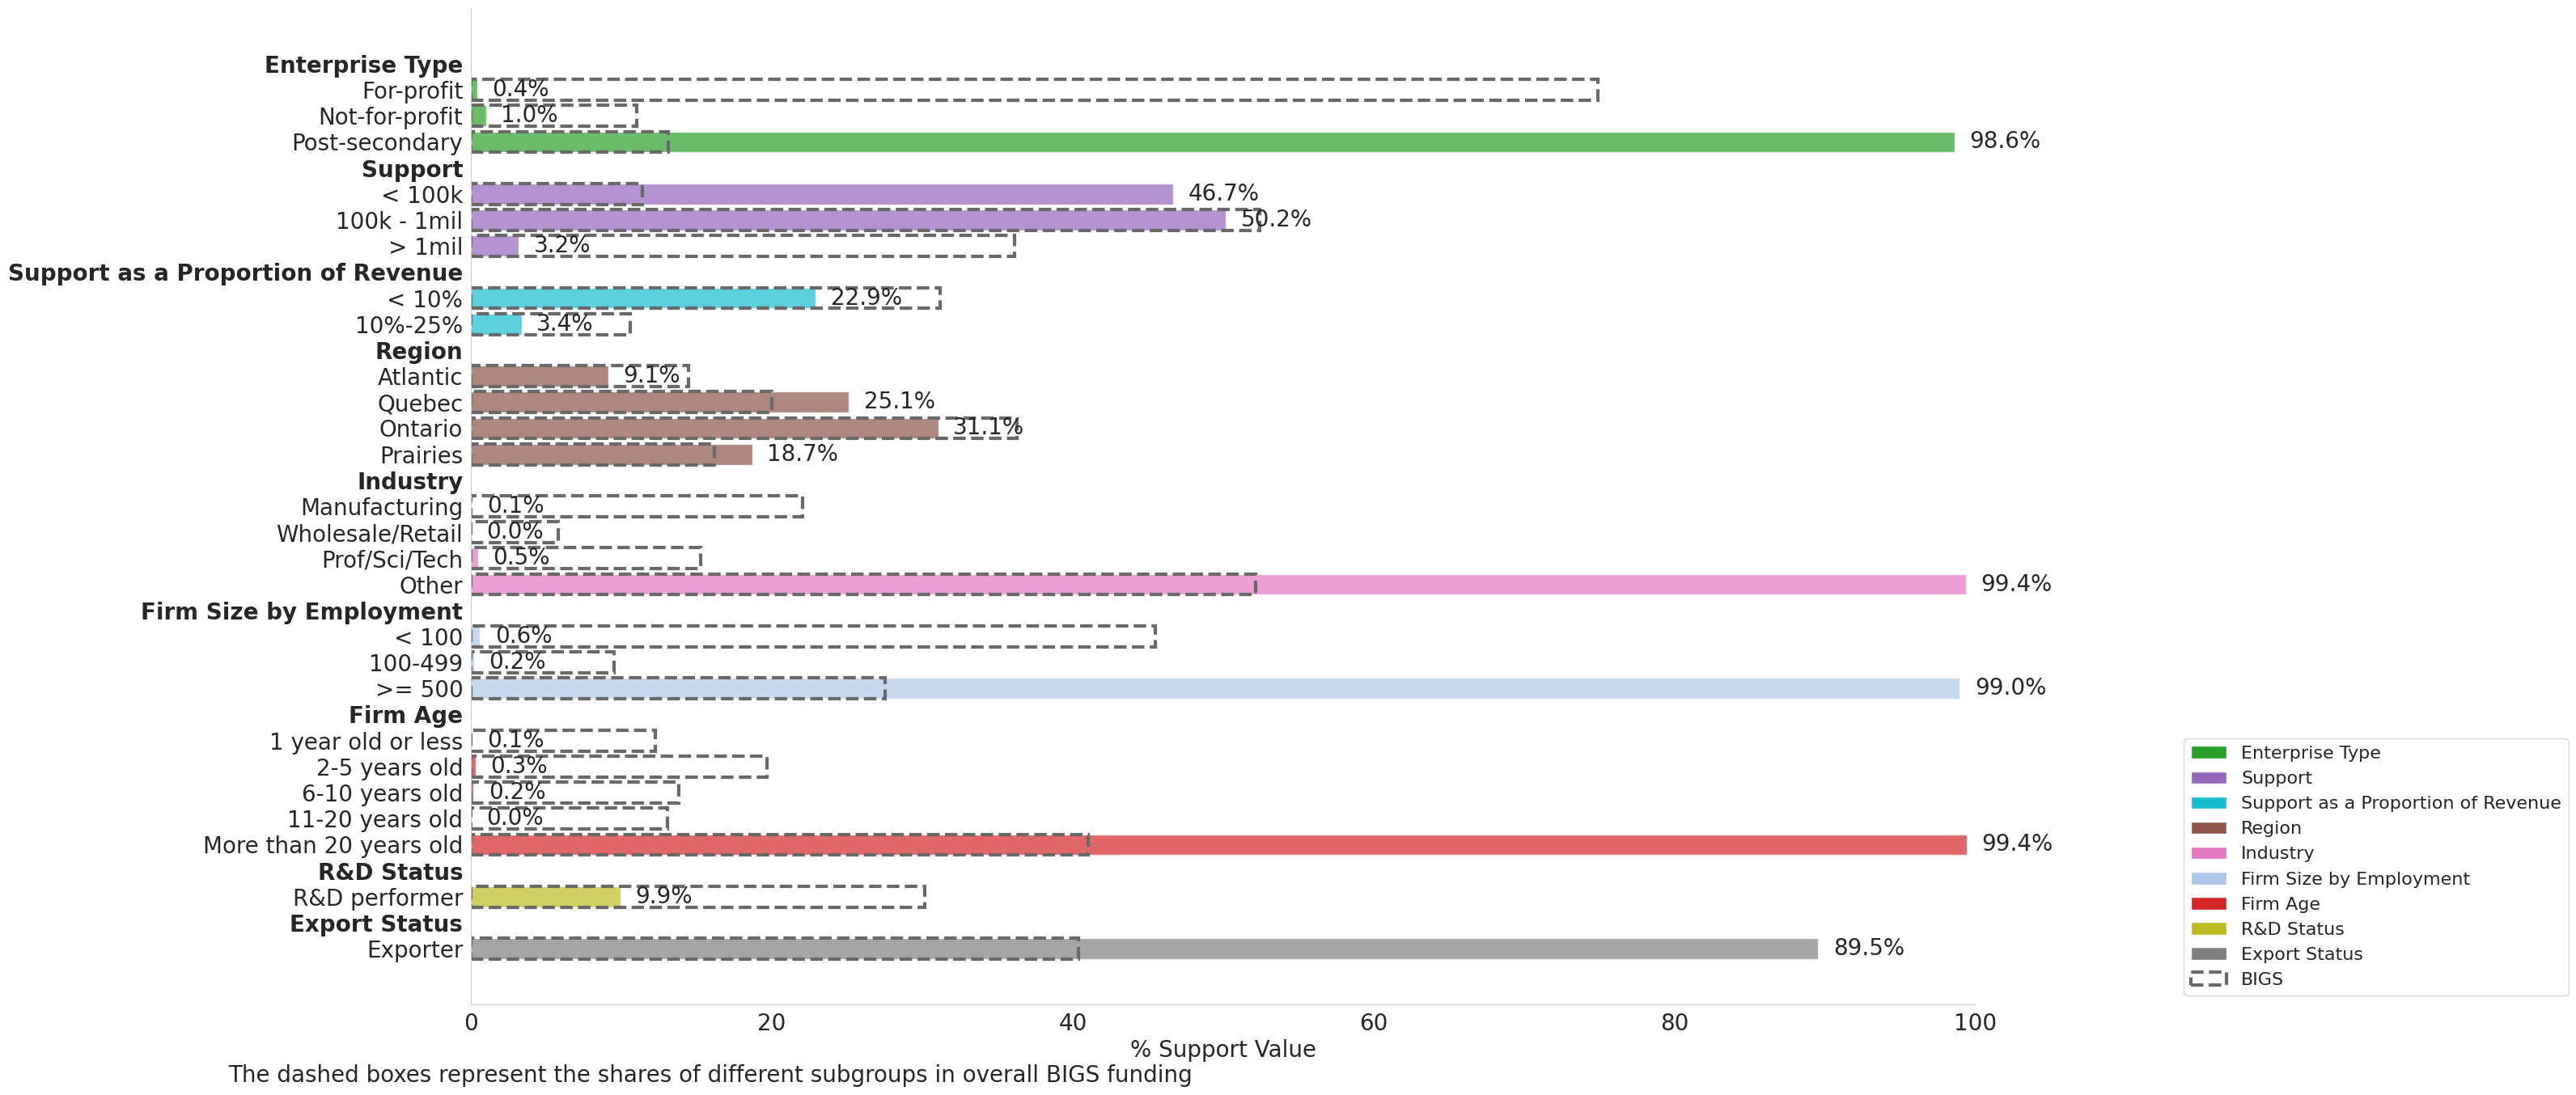

In [21]:
# @title Mitacs
def bargraph_labelling(df, df_total):
  df['percentage'] = df[outcome] / total * 100

  df_total = df_total.groupby('type').agg(total_value=(outcome, 'sum'))
  df_total['percentage'] = df_total['total_value'] / total_value * 100

  df = df.dropna(subset=[outcome])
  bars = ax.barh(df['type'], df['percentage'], color = color_mapping[key],  alpha=0.7, label=labels[key])
  for bar, pct in zip(bars, df['percentage']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%', va='center', fontsize = 20)

  # add the category's name to the figure
  gap_df = pd.DataFrame([{'type': labels[key],
                          'percentage': 0}])

  df_total = df_total[df_total.index.isin(df['type'])]
  ax.barh(df_total.index, df_total['percentage'], facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3)
  ax.barh(gap_df['type'], gap_df['percentage'])

# loop over heterogeneity variables
for program in ['Mitacs (ISED)']:
  for outcome in ['value']:
    fig, ax = plt.subplots(figsize=(24, 16))

    # compute the total value and total count before dropping any categories
    df_main = dataframes_clean['support_type'].copy()
    total = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022) & (df_main['type'] == 'Total')]
    total = total[outcome].sum()

    df_total = dataframes_total['support_type'].copy()
    df_total = df_total[(df_total['year'] == 2022) & (df_total['type'] == 'Total')]
    total_value = df_total[outcome].values[0]

    category_list = ['enterprise_type','support_intensity','support_rev', 'province', 'industry', 'emp', 'age', 'rd', 'export']
    for key in category_list[::-1]:
    # for key in custom_category_order[::-1]:
      #subsample
      df_main = dataframes_clean[key].copy()
      df_main = df_main[(df_main['program_select'] == program) & (df_main['year'] == 2022)]

      #total values
      df_total = dataframes_total[key].copy()
      df_total = df_total[df_total['year'] == 2022]

      if key == "support_type":
        continue
      if key == "enterprise_type":
        df = df_main[df_main.type.isin(['For-profit excluding NAICS 6112, 6113, 6114 and 6115',
                                        'Not-for-profit excluding NAICS 6112, 6113, 6114 and 6115',
                                        'Post-secondary institutions (NAICS 6112, 6113, 6114 or 6115)'])]
        df.loc[df['type'].str.contains('For-profit excluding NAICS 6112, 6113, 6114 and 6115'), 'type'] = 'For-profit'
        df.loc[df['type'].str.contains('Not-for-profit excluding NAICS 6112, 6113, 6114 and 6115'), 'type'] = 'Not-for-profit'
        df.loc[df['type'].str.contains('Post-secondary'), 'type'] = 'Post-secondary'

        df_total = df_total[df_total.type.isin(['For-profit excluding NAICS 6112, 6113, 6114 and 6115',
                                        'Not-for-profit excluding NAICS 6112, 6113, 6114 and 6115',
                                        'Post-secondary institutions (NAICS 6112, 6113, 6114 or 6115)'])]
        df_total.loc[df_total['type'].str.contains('For-profit excluding NAICS 6112, 6113, 6114 and 6115'), 'type'] = 'For-profit'
        df_total.loc[df_total['type'].str.contains('Not-for-profit excluding NAICS 6112, 6113, 6114 and 6115'), 'type'] = 'Not-for-profit'
        df_total.loc[df_total['type'].str.contains('Post-secondary'), 'type'] = 'Post-secondary'

        bargraph_labelling(df, df_total)
      if key == "age":
        df = df_main[df_main.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        df_total = df_total[df_total.type.isin(['More than 20 years old', '11-20 years old', '6-10 years old', '2-5 years old', '1 year old or less'])].copy()
        bargraph_labelling(df, df_total)
      if key == "support_intensity":
        df = df_main[~df_main.type.isin(['Total'])].copy()
        df.loc[df['type'].str.contains('less than'), 'type'] = '< 100k'
        df.loc[df['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df.loc[df['type'].str.contains('more than'), 'type'] = '> 1mil'

        df_total = df_total[~df_total.type.isin(['Total'])].copy()
        df_total.loc[df_total['type'].str.contains('less than'), 'type'] = '< 100k'
        df_total.loc[df_total['type'].str.contains('between'), 'type'] = '100k - 1mil'
        df_total.loc[df_total['type'].str.contains('more than'), 'type'] = '> 1mil'

        bargraph_labelling(df, df_total)
      if key == "province":
        df = df_main[df_main.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        df_total = df_total[df_total.type.isin(['British Columbia','Prairies', 'Ontario','Quebec', 'Atlantic','Territories'])].copy()
        bargraph_labelling(df, df_total)
      if key == "industry":
        df = df_main[df_main.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df.loc[df['type'].str.contains('All other industries'), 'type'] = 'Other'
        df.loc[df['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df.loc[df['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df.loc[df['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'

        df_total = df_total[df_total.type.isin(['All other industries',
                              '54 - Professional, Scientific and Technical Services',
                              '44-45 - Wholesale and Retail Trade',
                              '31-33 - Manufacturing'])].copy()
        df_total.loc[df_total['type'].str.contains('All other industries'), 'type'] = 'Other'
        df_total.loc[df_total['type'].str.contains('Professional'), 'type'] = 'Prof/Sci/Tech'
        df_total.loc[df_total['type'].str.contains('Wholesale and Retail'), 'type'] = 'Wholesale/Retail'
        df_total.loc[df_total['type'].str.contains('Manufacturing'), 'type'] = 'Manufacturing'


        bargraph_labelling(df, df_total)
      if key == "export":
        df = df_main[df_main.type.isin(['Exporter'])].copy()
        df_total = df_total[df_total.type.isin(['Exporter'])].copy()
        bargraph_labelling(df, df_total)
      if key == "rd":
        df = df_main[df_main.type.isin(['R&D performer'])].copy()
        df_total = df_total[df_total.type.isin(['R&D performer'])].copy()
        bargraph_labelling(df, df_total)
      if key == "support_rev":
        df = df_main[df_main.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df.loc[df['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df.loc[df['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df.loc[df['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df.loc[df['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'
        df_total = df_total[df_total.type.isin(['Value of support received is more than 50% of revenue',
                              'Value of support received is more than 25% of revenue and 50% of revenue or less',
                              'Value of support received is more than 10% of revenue and 25% of revenue or less',
                              'Value of support received is 10% of revenue or less'])].copy()
        df_total.loc[df_total['type'].str.contains('10% of revenue or less'), 'type'] = '< 10%'
        df_total.loc[df_total['type'].str.contains('25% of revenue or less'), 'type'] = '10%-25%'
        df_total.loc[df_total['type'].str.contains('50% of revenue or less'), 'type'] = '25%-50%'
        df_total.loc[df_total['type'].str.contains('more than 50% of revenue'), 'type'] = '>50%'

        bargraph_labelling(df, df_total)
      if key == "emp":
        df = df_main[df_main.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df.loc[df['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df.loc[df['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df.loc[df['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        df_total = df_total[df_total.type.isin(['Large enterprises',
                              'Medium Enterprises',
                              'Small enterprises'])].copy()
        df_total.loc[df_total['type'].str.contains('Small enterprises'), 'type'] = '< 100'
        df_total.loc[df_total['type'].str.contains('Medium Enterprises'), 'type'] = '100-499'
        df_total.loc[df_total['type'].str.contains('Large enterprises'), 'type'] = '>= 500'

        bargraph_labelling(df, df_total)
      if key == "hg":
        df2 = df_main[df_main.type.isin(['Total'])].copy()
        df = df_main[df_main.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df.loc[df['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        df_total = df_total[df_total.type.isin(['High-growth-by-revenue'])].copy().sort_values(by=outcome)
        df_total.loc[df_total['type'].str.contains('High-growth-by-revenue'), 'type'] = 'HG'

        bargraph_labelling(df, df_total)
      else:
        continue

    # Create legend handles using consistent colors and labels
    legend_handles = [
        Patch(facecolor=color_mapping[key], label=labels[key])
        for key in category_list if key in labels and key in color_mapping
    ]
    extra_handle = Patch(facecolor='none', edgecolor='dimgray', linestyle='--', linewidth=3, label='BIGS')
    legend_handles.append(extra_handle)
    plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0), handles=legend_handles, fontsize = 16)

    # formatting y-axis
    yticks      = ax.get_yticks()
    yticklabels = ax.get_yticklabels()

    # Set bold font for specific categories
    for label in yticklabels:
        if label.get_text() in labels.values():
            label.set_fontweight('bold')

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlabel(outcome_label2[outcome], fontsize=20)
    plt.xlim(0, 100)
    plt.grid(False)
    plt.figtext(0, 0.05, "The dashed boxes represent the shares of different subgroups in overall BIGS funding", ma='left', fontsize=20)
    plt.savefig(f'{program}_{outcome}_share_2022.png', bbox_inches='tight')
    plt.show()

# Economic Outcomes by Program

In [31]:
#@title Create total and average support dataframe
dataframes_clean = {}

for key in ['beneficiary']:
  df = dataframes[key].copy()

  for col in ['value', 'num']:
    df[col] = df[col].replace('X', np.nan)
    df[col] = df[col].replace('x', np.nan)
    df[col] = df[col].replace('...', np.nan)
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

  df['value'] = df['value']/1e6
  df['avg_value'] = df['value']/df['num'] *1e3

  # remove special characters
  df['program']     = df['program'].astype(str).str.replace("\n", " ")
  df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")
  df['type']        = df['type'].astype(str).str.replace("\n", " ")

  # Drop aggregated value to avoid double-counting
  df = df[df['value_level'].str.contains('Total')]
  df = df[df['type'].str.contains('Total')]
  df.drop(columns='value_level', inplace=True)

  # identify program-level support
  # Identify all the programs and drop the disaggregated observations to avoid suppressed values
  # here I manually include IRAP, Non IRAP programs
  df = df[  (df['program_id'].str.contains('Total') ) |
            (df['program_id'].str.contains('_00') ) |
            (df['program_id'].str.contains('IRAP') )
        ]

  # drop all the subprograms of NRC expect for IRAP and NONIRAP
  df = df[~df['program_id'].str.contains('NONIRAP') ]

  df['program_id'] = df['program_id'].str.replace("_00", '')
  df['program_id'] = df['program_id'].str.replace("(Total)", '')
  df['program_id'] = df['program_id'].str.strip()

  df['program'] = df['program'].str.replace("(Total)", '')
  df['program'] = df['program'].str.strip()

  # Drop duplicates where both '_00' and 'Total' are reported
  df = df.drop_duplicates(subset=['year', 'program_id', 'type'], keep='first')

  dataframes_clean[key] = df

## Employment Growth vs. Total Support Value

In [32]:
#@title employment growth dataframe
df = dataframes_performance['emp'].copy()

for col in df.columns:
  df[col] = df[col].replace('X', np.nan)
  df[col] = df[col].replace('x', np.nan)
  df[col] = df[col].replace('...', np.nan)
  df[col] = df[col].astype(str).str.replace(',', '')

# remove special characters
df['program']     = df['program'].astype(str).str.replace("\n", " ")
df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")

# drop support with zero value i.e. advisory services
df = df[df['value_level'].str.contains('Total')]
df = df.drop(columns='value_level')

# identify program-level support
# Identify all the programs and drop the disaggregated observations to avoid suppressed values
# here I manually include IRAP, Non IRAP programs
df = df[~df['program_id'].isin(['TOTAL'])]
df = df[  (df['program_id'].str.contains('Total') ) |
          (df['program'].str.contains('Total') ) |
          (df['program_id'].str.contains('_00') ) |
          (df['program_id'].str.contains('IRAP') )
      ]

# drop all the subprograms of NRC expect for IRAP and NONIRAP
df = df[~df['program_id'].str.contains('NONIRAP') ]

df['program_id'] = df['program_id'].str.replace("_00", '')
df['program_id'] = df['program_id'].str.replace("(Total)", '')
df['program_id'] = df['program_id'].str.strip()

df['program'] = df['program'].str.replace("(Total)", '')
df['program'] = df['program'].str.strip()

# Drop duplicates where both '_00' and 'Total' are reported
df = df.drop_duplicates(subset=['year', 'program_id'], keep='first')

for col in ['year', 'num_pos_emp', 'num_pos_emp3', 'median_emp']:
  df[col] = df[col].astype(float)

# merge with total support value
df_support = dataframes_clean['beneficiary'].copy()
df_support = df_support[['year', 'program_id', 'value', 'avg_value']]
df_support.rename(columns={'value': 'support',
                           'avg_value': 'avg_support'
                          }, inplace=True)

df = df.merge(df_support, on=['year', 'program_id'], how='left')
df = df.dropna(subset=['median_emp', 'support', 'num_pos_emp3'])

/tmp/ipython-input-1991626247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('X', np.nan)


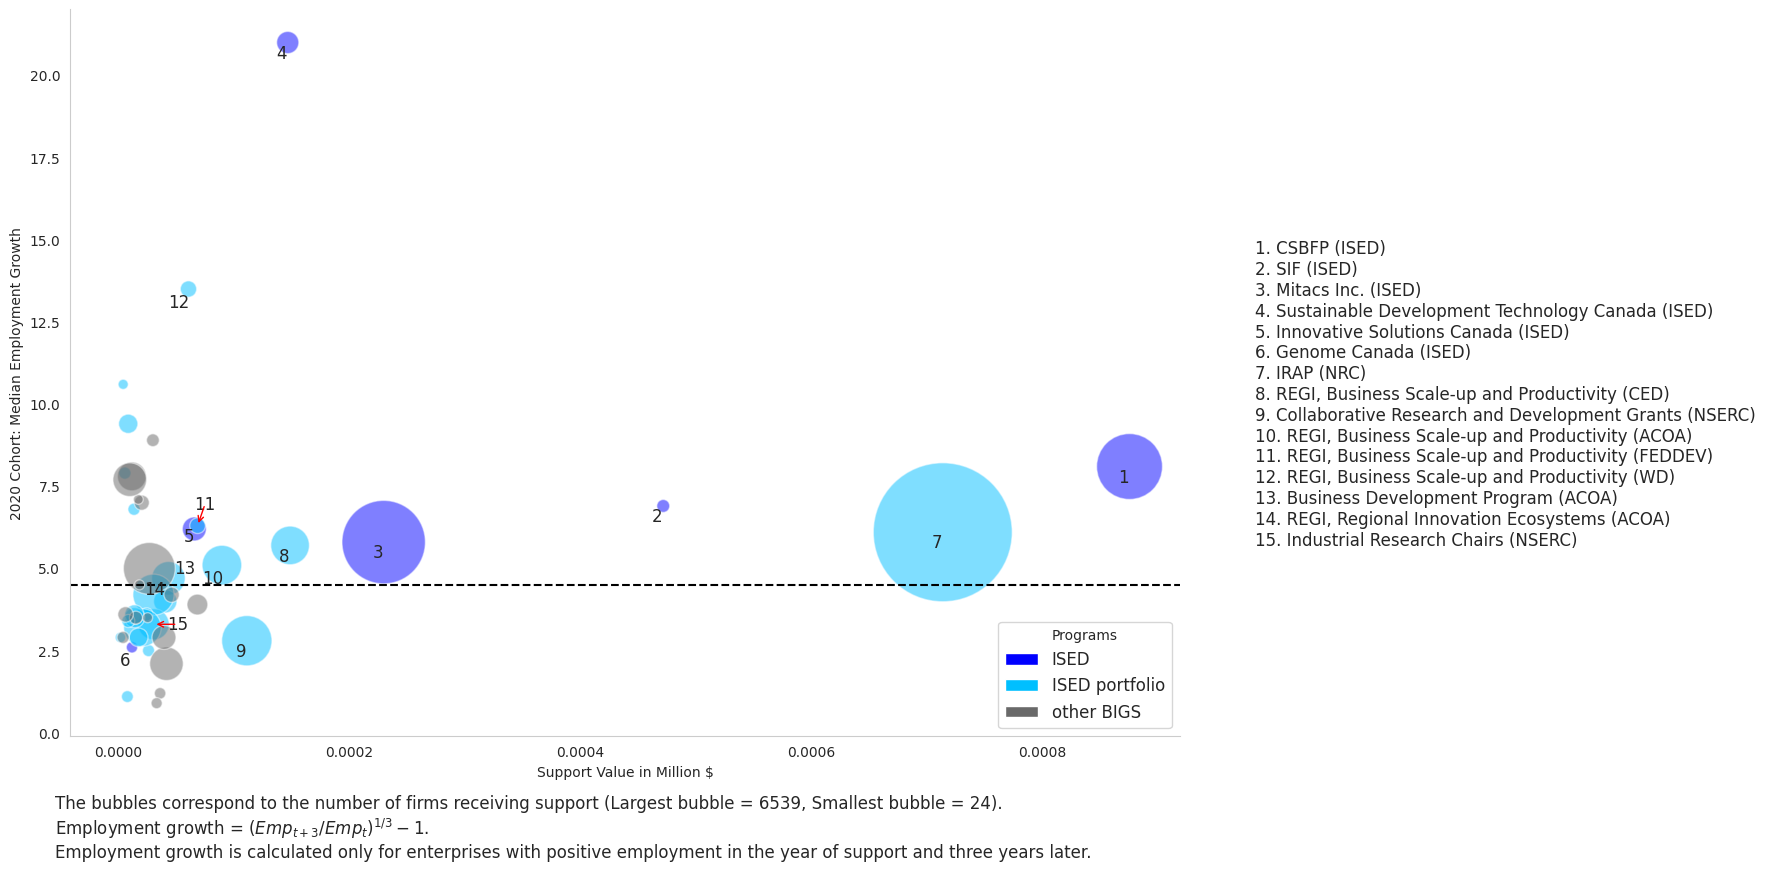

In [33]:
# @title Total Support Value vs. Employment Growth
for y in [2020]:
    plt.figure(figsize=(12, 8))
    data = df[df['year'] == y].copy()

    data.loc[:, 'color'] = 'dimgrey'
    data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

    data.loc[:, 'ised_portfolio'] = 'other BIGS'
    data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

    data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
    data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
    data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
    data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

    # Rename program labels
    data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

    data = data.sort_values(['ised_portfolio', 'support'], ascending=[True, False])



    sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
    sns.scatterplot(x='support', y='median_emp', hue='ised_portfolio', size='num_pos_emp3',
                    color=data['color'], linewidth=1, alpha=0.5,
                    legend=False, sizes=(50, 10000), data=data)

    # Annotate each point with a unique number
    texts = []
    program_mapping = []
    for i in range(len(data)):
      if i < 15:
        number = i + 1
        texts.append(plt.text(data.iloc[i]['support'], data.iloc[i]['median_emp'], str(number),
                              fontsize=12, ha='center', va='center'))
        program_mapping.append(f"{number}. {data.iloc[i]['program']}")

    adjust_text(texts,
                expand_text=(2, 2),
                expand_point=(2, 2),
                arrowprops=dict(arrowstyle='->', color='red'))

    legend_elements = [
        Patch(facecolor='blue', label='ISED'),
        Patch(facecolor='deepskyblue', label='ISED portfolio'),
        Patch(facecolor='dimgrey', label='other BIGS')
    ]

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend(title='Programs', loc='lower right', handles=legend_elements, fontsize=12)
    # This figure shows the median of the enterprises three-year percentage employment growth between the year of support and three years after support. \n
    text = "The bubbles correspond to the number of firms receiving support (Largest bubble = 6539, Smallest bubble = 24).\nEmployment growth = $(Emp_{t+3}/Emp_{t})^{1/3}-1$.\nEmployment growth is calculated only for enterprises with positive employment in the year of support and three years later."

    plt.figtext(0.05, 0, text, fontsize=12, ha='left', va='top')

    # Display the numbered list of programs next to the figure
    mapping_text = "\n".join(program_mapping)
    plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

    # add a horizontal line at y = 0
    plt.axhline(y=4.5, color='black', linestyle='--')

    plt.grid(False)
    plt.xlabel('Support Value in Million $')
    plt.ylabel(f'{y} Cohort: Median Employment Growth')
    plt.tight_layout()
    plt.savefig(f'emp_gr_program_{y}_annotated.png', bbox_inches='tight')
    plt.show()

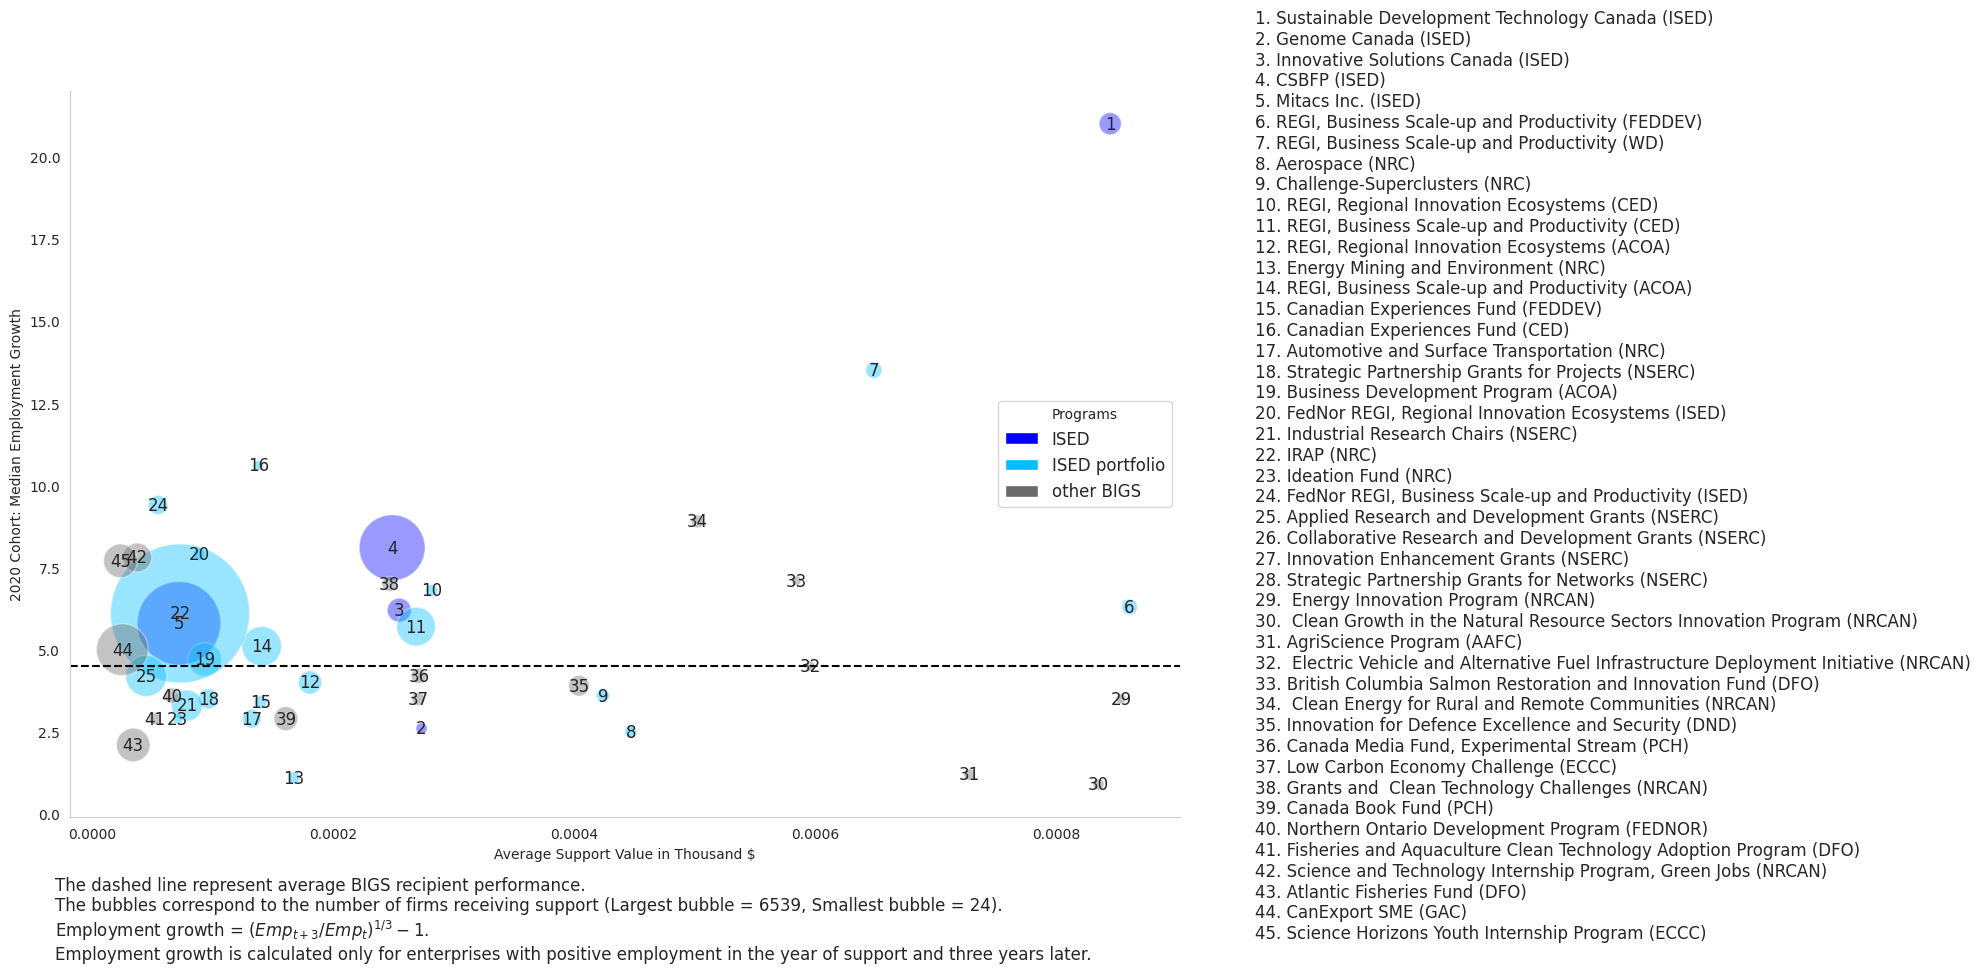

In [34]:
# @title Average Support Value vs. Employment Growth
for y in [2020]:
    plt.figure(figsize=(12, 8))
    data = df[df['year'] == y].copy()

    data.loc[:, 'color'] = 'dimgrey'
    data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

    data.loc[:, 'ised_portfolio'] = 'other BIGS'
    data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

    data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
    data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
    data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
    data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

    # Rename program labels
    data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

    data = data.sort_values(['ised_portfolio', 'avg_support'], ascending=[True, False])

    #drop SIF because its value is too large
    data = data[data['program'] != 'SIF (ISED)']

    sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
    sns.scatterplot(x='avg_support', y='median_emp', hue='ised_portfolio', size='num_pos_emp3',
                    color=data['color'], linewidth=1, alpha=0.4,
                    legend=False, sizes=(50, 10000), data=data)

    # Annotate each point with a unique number
    texts = []
    program_mapping = []
    for i in range(len(data)):
      number = i + 1
      texts.append(plt.text(data.iloc[i]['avg_support'], data.iloc[i]['median_emp'], str(number),
                            fontsize=12, ha='center', va='center'))
      program_mapping.append(f"{number}. {data.iloc[i]['program']}")

    legend_elements = [
        Patch(facecolor='blue', label='ISED'),
        Patch(facecolor='deepskyblue', label='ISED portfolio'),
        Patch(facecolor='dimgrey', label='other BIGS')
    ]

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend(title='Programs', loc='center right', handles=legend_elements, fontsize=12)
    # This figure shows the median of the enterprises three-year percentage employment growth between the year of support and three years after support. \n
    text = "The dashed line represent average BIGS recipient performance. \nThe bubbles correspond to the number of firms receiving support (Largest bubble = 6539, Smallest bubble = 24).\nEmployment growth = $(Emp_{t+3}/Emp_{t})^{1/3}-1$.\nEmployment growth is calculated only for enterprises with positive employment in the year of support and three years later."

    plt.figtext(0.05, 0, text, fontsize=12, ha='left', va='top')

    # Display the numbered list of programs next to the figure
    mapping_text = "\n".join(program_mapping)
    plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

    # add a horizontal line at y = 0
    plt.axhline(y=4.5, color='black', linestyle='--')

    plt.grid(False)
    plt.xlabel('Average Support Value in Thousand $')
    plt.ylabel(f'{y} Cohort: Median Employment Growth')
    plt.tight_layout()
    plt.savefig(f'emp_gr_program_{y}_annotated.png', bbox_inches='tight')
    plt.show()

## Revenue Growth vs. Support Value

In [37]:
#@title revenue growth dataframe
df = dataframes_performance['rev'].copy()

for col in df.columns:
  df[col] = df[col].replace('X', np.nan)
  df[col] = df[col].replace('x', np.nan)
  df[col] = df[col].replace('...', np.nan)
  df[col] = df[col].astype(str).str.replace(',', '')

# remove special characters
df['program']     = df['program'].astype(str).str.replace("\n", " ")
df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")

# drop support with zero value i.e. advisory services
df = df[df['value_level'].str.contains('Total')]
df = df.drop(columns='value_level')

# identify program-level support
# Identify all the programs and drop the disaggregated observations to avoid suppressed values
# here I manually include IRAP, Non IRAP programs
df = df[~df['program_id'].isin(['TOTAL'])]
df = df[  (df['program_id'].str.contains('Total') ) |
          (df['program'].str.contains('Total') ) |
          (df['program_id'].str.contains('_00') ) |
          (df['program_id'].str.contains('IRAP') )
      ]

# drop all the subprograms of NRC expect for IRAP and NONIRAP
df = df[~df['program_id'].str.contains('NONIRAP') ]

df['program_id'] = df['program_id'].str.replace("_00", '')
df['program_id'] = df['program_id'].str.replace("(Total)", '')
df['program_id'] = df['program_id'].str.strip()

df['program'] = df['program'].str.replace("(Total)", '')
df['program'] = df['program'].str.strip()

# Drop duplicates where both '_00' and 'Total' are reported
df = df.drop_duplicates(subset=['year', 'program_id'], keep='first')

for col in ['year', 'num_pos_rev', 'num_pos_rev3', 'median_rev']:
  df[col] = df[col].astype(float)

# merge with total support value
df_support = dataframes_clean['beneficiary'].copy()
df_support = df_support[['year', 'program_id', 'value', 'avg_value']]
df_support.rename(columns={'value': 'support',
                           'avg_value': 'avg_support'
                          }, inplace=True)

df = df.merge(df_support, on=['year', 'program_id'], how='left')
df = df.dropna(subset=['median_rev', 'support', 'num_pos_rev3'])

/tmp/ipython-input-2926637705.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('X', np.nan)


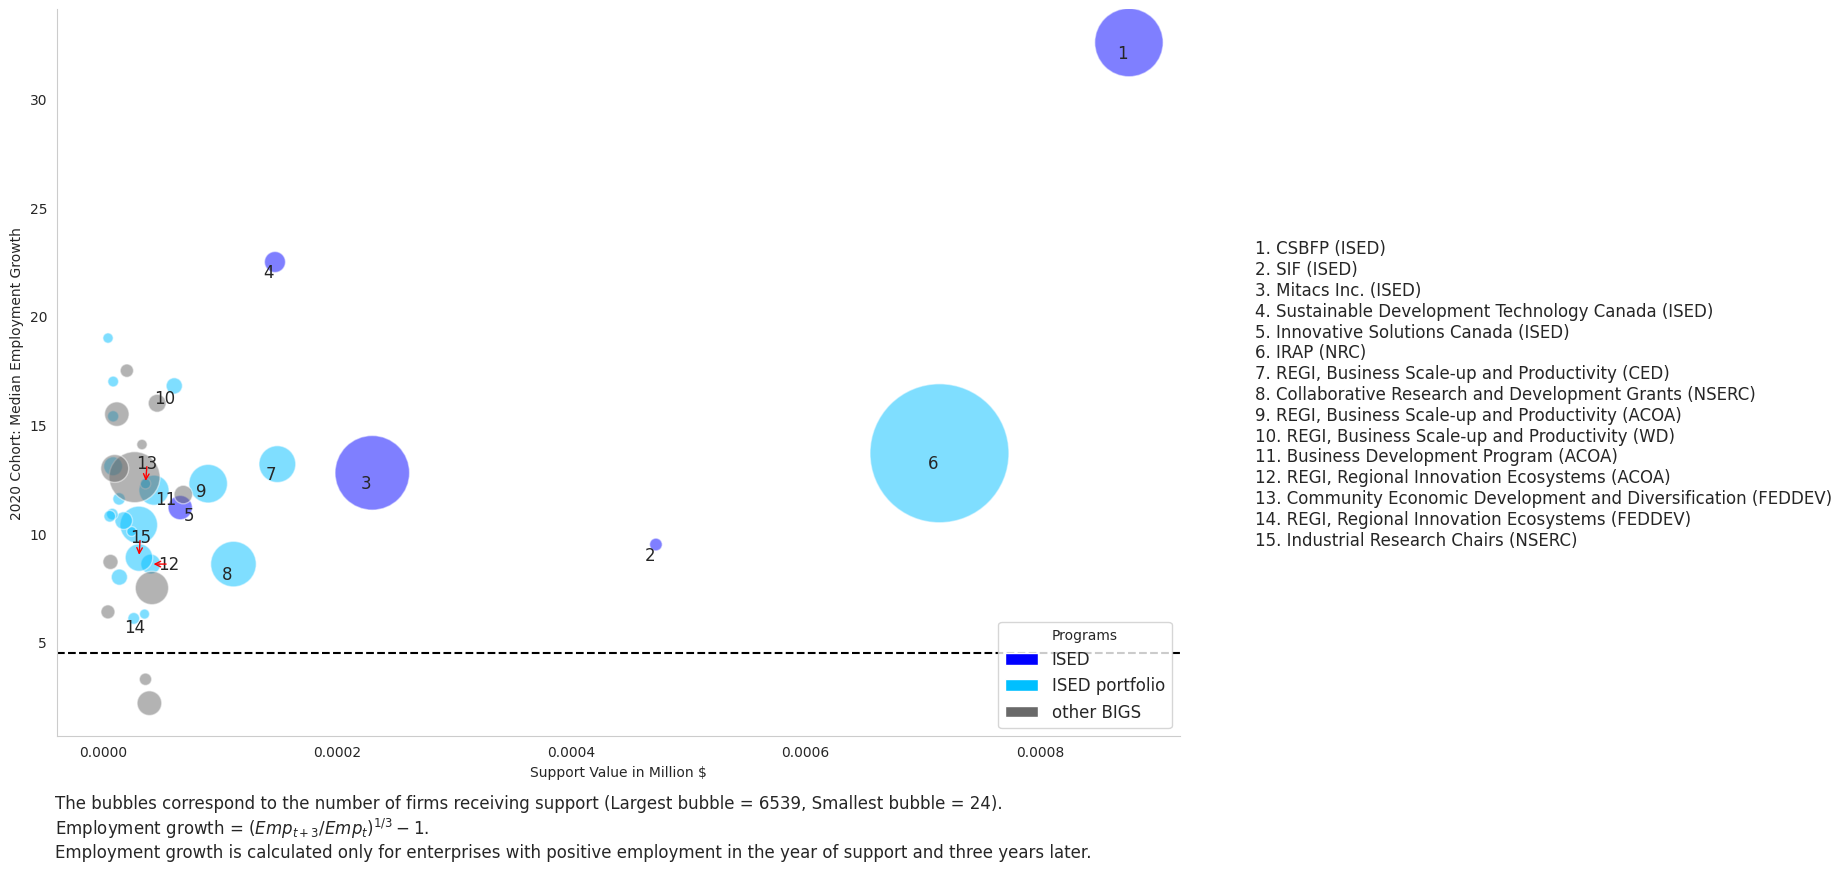

In [38]:
# @title Revenue Growth vs. Support Value
for y in [2020]:
    plt.figure(figsize=(12, 8))
    data = df[df['year'] == y].copy()

    data.loc[:, 'color'] = 'dimgrey'
    data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

    data.loc[:, 'ised_portfolio'] = 'other BIGS'
    data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
    data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

    data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
    data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
    data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
    data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

    # Rename program labels
    data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
    data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

    data = data.sort_values(['ised_portfolio', 'support'], ascending=[True, False])



    sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
    sns.scatterplot(x='support', y='median_rev', hue='ised_portfolio', size='num_pos_rev3',
                    color=data['color'], linewidth=1, alpha=0.5,
                    legend=False, sizes=(50, 10000), data=data)

    # Annotate each point with a unique number
    texts = []
    program_mapping = []
    for i in range(len(data)):
      if i < 15:
        number = i + 1
        texts.append(plt.text(data.iloc[i]['support'], data.iloc[i]['median_rev'], str(number),
                              fontsize=12, ha='center', va='center'))
        program_mapping.append(f"{number}. {data.iloc[i]['program']}")

    adjust_text(texts,
                expand_text=(2, 2),
                expand_point=(2, 2),
                arrowprops=dict(arrowstyle='->', color='red'))

    legend_elements = [
        Patch(facecolor='blue', label='ISED'),
        Patch(facecolor='deepskyblue', label='ISED portfolio'),
        Patch(facecolor='dimgrey', label='other BIGS')
    ]

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend(title='Programs', loc='lower right', handles=legend_elements, fontsize=12)
    # This figure shows the median of the enterprises three-year percentage employment growth between the year of support and three years after support. \n
    text = "The bubbles correspond to the number of firms receiving support (Largest bubble = 6539, Smallest bubble = 24).\nEmployment growth = $(Emp_{t+3}/Emp_{t})^{1/3}-1$.\nEmployment growth is calculated only for enterprises with positive employment in the year of support and three years later."

    plt.figtext(0.05, 0, text, fontsize=12, ha='left', va='top')

    # Display the numbered list of programs next to the figure
    mapping_text = "\n".join(program_mapping)
    plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

    # add a horizontal line at y = 0
    plt.axhline(y=4.5, color='black', linestyle='--')

    plt.grid(False)
    plt.xlabel('Support Value in Million $')
    plt.ylabel(f'{y} Cohort: Median Employment Growth')
    plt.tight_layout()
    plt.savefig(f'rev_gr_program_{y}_annotated.png', bbox_inches='tight')
    plt.show()

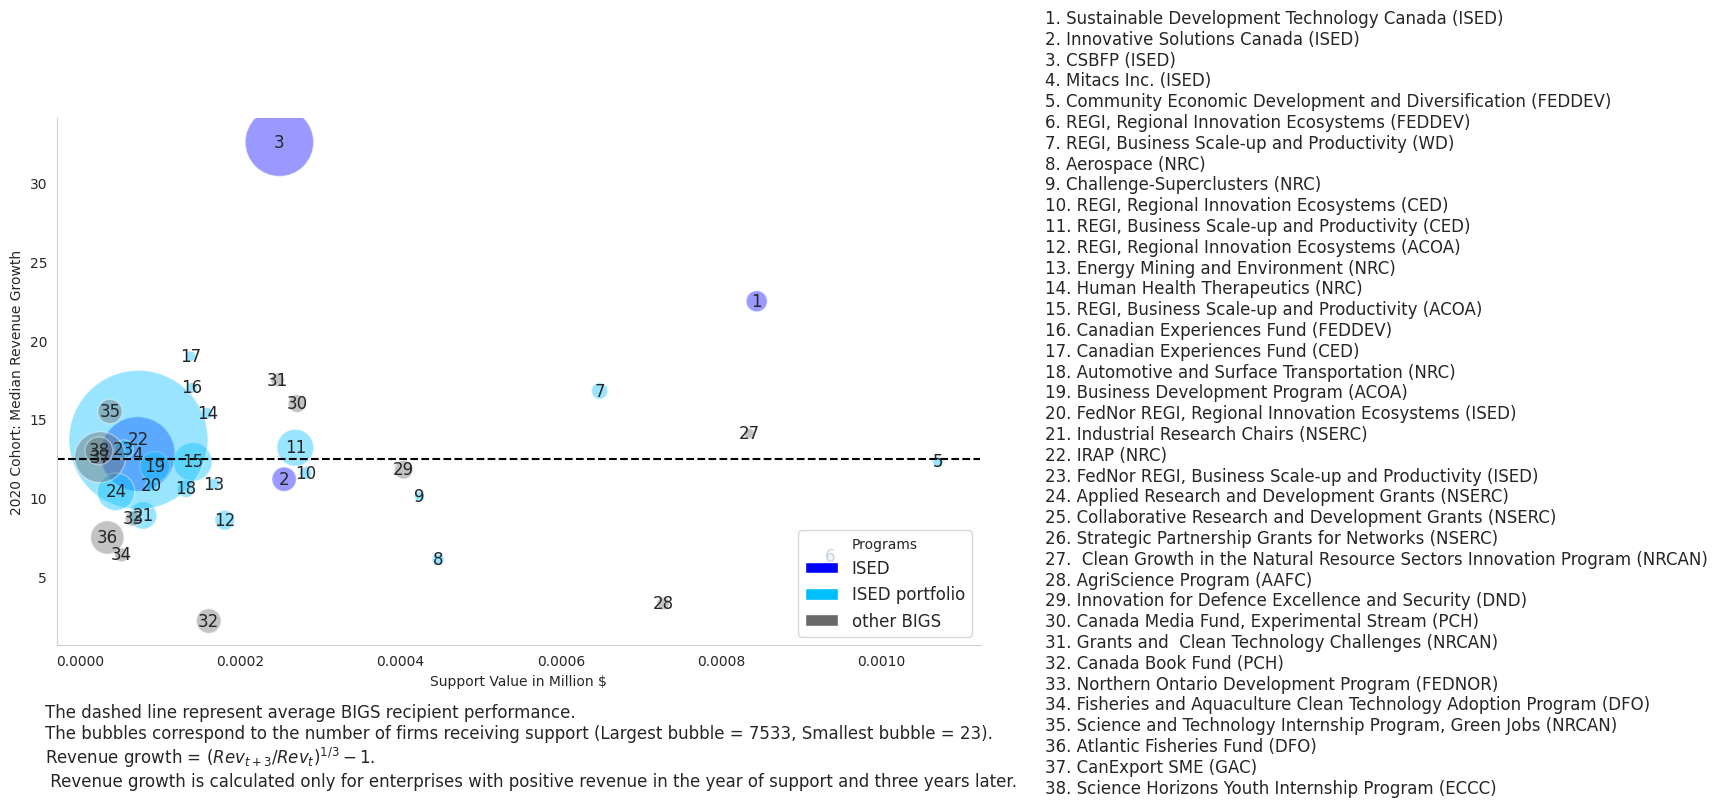

In [39]:
# @title Average Support Value vs. Revenue Growth
# for y in 2014, 2015, 2016, 2017, 2018, 2019, 2020:
for y in [2020]:
  plt.figure(figsize=(10, 6))
  data = df[df['year'] == y].copy()

  data.loc[:, 'color'] = 'dimgrey'
  data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

  data.loc[:, 'ised_portfolio'] = 'other BIGS'
  data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

  data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
  data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
  data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
  data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

  # rename program labels
  data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

  # Remove everything after the underscore
  # data['program_id'] = [p.split('_')[0] for p in data.program_id.unique()]
  data = data.sort_values(['ised_portfolio', 'avg_support'], ascending=[True, False])

  #drop SIF because its value is too large
  data = data[data['program'] != 'SIF (ISED)']


  sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
  sns.scatterplot(x='avg_support', y='median_rev', hue='ised_portfolio', size='num_pos_rev3',
                  linewidth=1, alpha = 0.4,
                  legend=False, sizes=(50,10000), data=data)

  # Annotate each point with a unique number
  texts = []
  program_mapping = []
  for i in range(len(data)):
    number = i + 1
    texts.append(plt.text(data.iloc[i]['avg_support'], data.iloc[i]['median_rev'], str(number),
                          fontsize=12, ha='center', va='center'))
    program_mapping.append(f"{number}. {data.iloc[i]['program']}")

  legend_elements = [
    Patch(facecolor='blue', label='ISED'),
    Patch(facecolor='deepskyblue', label='ISED portfolio'),
    Patch(facecolor='dimgrey', label='other BIGS')
  ]
  # Remove top and right spines
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  plt.tight_layout()
  plt.legend(title='Programs', loc='lower right', handles=legend_elements, fontsize=12)
  text = "The dashed line represent average BIGS recipient performance. \nThe bubbles correspond to the number of firms receiving support (Largest bubble = 7533, Smallest bubble = 23). \nRevenue growth = $(Rev_{t+3}/Rev_{t})^{1/3}-1$. \n Revenue growth is calculated only for enterprises with positive revenue in the year of support and three years later."

  plt.figtext(0.05 , 0, text, fontsize=12, ha='left', va='top')

  # Display the numbered list of programs next to the figure
  mapping_text = "\n".join(program_mapping)
  plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

  # add a horizontal line at y = 0
  plt.axhline(y=12.5, color='black', linestyle='--')

  plt.grid(False)
  plt.xlabel('Support Value in Million $')
  plt.ylabel(f'{y} Cohort: Median Revenue Growth')
  plt.savefig(f'rev_gr_program_{y}.png', bbox_inches='tight')
  plt.show()

## Productivity Growth vs. Support Value

In [40]:
#@title revenue growth dataframe
df = dataframes_performance['prod'].copy()

for col in df.columns:
  df[col] = df[col].replace('X', np.nan)
  df[col] = df[col].replace('x', np.nan)
  df[col] = df[col].replace('...', np.nan)
  df[col] = df[col].astype(str).str.replace(',', '')

# remove special characters
df['program']     = df['program'].astype(str).str.replace("\n", " ")
df['value_level'] = df['value_level'].astype(str).str.replace("\n", " ")

# drop support with zero value i.e. advisory services
df = df[df['value_level'].str.contains('Total')]
df = df.drop(columns='value_level')

# identify program-level support
# Identify all the programs and drop the disaggregated observations to avoid suppressed values
# here I manually include IRAP, Non IRAP programs
df = df[~df['program_id'].isin(['TOTAL'])]
df = df[  (df['program_id'].str.contains('Total') ) |
          (df['program'].str.contains('Total') ) |
          (df['program_id'].str.contains('_00') ) |
          (df['program_id'].str.contains('IRAP') )
      ]

# drop all the subprograms of NRC expect for IRAP and NONIRAP
df = df[~df['program_id'].str.contains('NONIRAP') ]

df['program_id'] = df['program_id'].str.replace("_00", '')
df['program_id'] = df['program_id'].str.replace("(Total)", '')
df['program_id'] = df['program_id'].str.strip()

df['program'] = df['program'].str.replace("(Total)", '')
df['program'] = df['program'].str.strip()

# Drop duplicates where both '_00' and 'Total' are reported
df = df.drop_duplicates(subset=['year', 'program_id'], keep='first')

for col in ['year', 'num_pos_inc', 'num_pos_inc3', 'median_prod']:
  df[col] = df[col].astype(float)

# merge with total support value
df_support = dataframes_clean['beneficiary'].copy()
df_support = df_support[['year', 'program_id', 'value', 'avg_value']]
df_support.rename(columns={'value': 'support',
                           'avg_value': 'avg_support'
                          }, inplace=True)

df = df.merge(df_support, on=['year', 'program_id'], how='left')
df = df.dropna(subset=['median_prod', 'support', 'num_pos_inc3'])

<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3353418275.py:64: SyntaxWarning: invalid escape sequence '\d'
  text = "The bubbles correspond to the number of firms receiving support (Largest bubble = 6363, Smallest bubble = 24). \n$\delta VA = {(Value Added / Employment)}_{t+3} - {(Value Added / Employment)}_{t}$. \nValue-added is net income before tax (GIFI line 9970) plus PD7 (payroll deduction file) annual pay. \n Productivity is value-added divided by the average number of employees during the year according to PD7 payroll deduction files. \n Change in productivity is calculated only for enterprises with non-zero income and non-zero employment in the year of support and three years later."


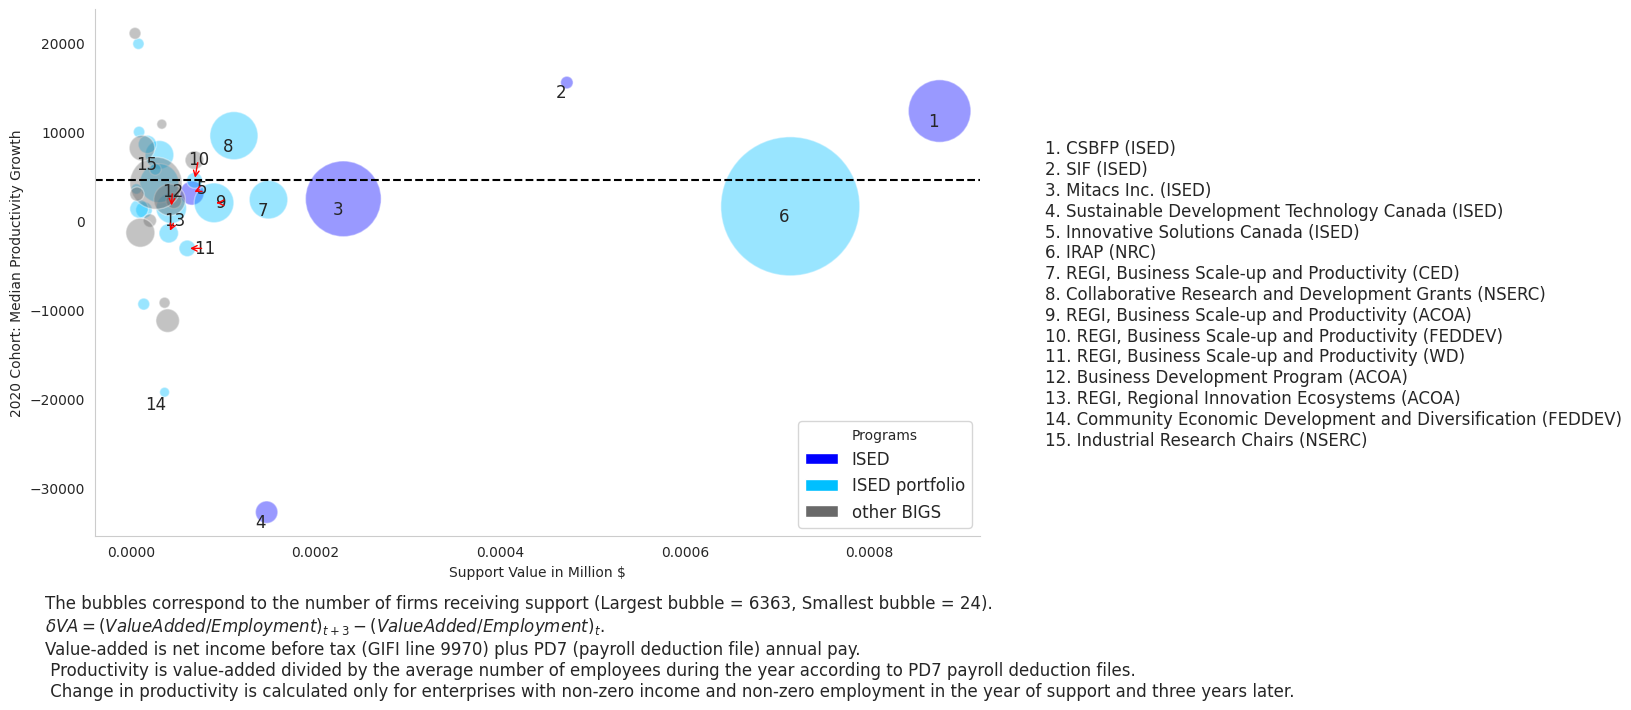

In [41]:
# @title Total Support Value vs. Productivity Growth
# for y in 2014, 2015, 2016, 2017, 2018, 2019, 2020:
for y in [2020]:
  plt.figure(figsize=(10, 6))
  data = df[df['year'] == y].copy()

  data.loc[:, 'color'] = 'dimgrey'
  data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

  data.loc[:, 'ised_portfolio'] = 'other BIGS'
  data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

  data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
  data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
  data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
  data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

  # rename program labels
  data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

  # Remove everything after the underscore
  # data['program_id'] = [p.split('_')[0] for p in data.program_id.unique()]
  data = data.sort_values(['ised_portfolio', 'support'], ascending=[True, False])
  sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
  sns.scatterplot(x='support', y='median_prod', hue='ised_portfolio', size='num_pos_inc3',
                  color ='color', linewidth=1, alpha = 0.4,
                  legend=False, sizes=(50,10000), data=data)

  # Annotate each point with a unique number
  texts = []
  program_mapping = []
  for i in range(len(data)):
    if i < 15:
      number = i + 1
      texts.append(plt.text(data.iloc[i]['support'], data.iloc[i]['median_prod'], str(number),
                            fontsize=12, ha='center', va='center'))
      program_mapping.append(f"{number}. {data.iloc[i]['program']}")

  adjust_text(texts,
              expand_text=(2, 2),
              expand_point=(2, 2),
              arrowprops=dict(arrowstyle='->', color='red'))

  legend_elements = [
    Patch(facecolor='blue', label='ISED'),
    Patch(facecolor='deepskyblue', label='ISED portfolio'),
    Patch(facecolor='dimgrey', label='other BIGS')
  ]
  # Remove top and right spines
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  plt.tight_layout()
  plt.legend(title='Programs', loc='lower right', handles=legend_elements, fontsize=12)
  text = "The bubbles correspond to the number of firms receiving support (Largest bubble = 6363, Smallest bubble = 24). \n$\delta VA = {(Value Added / Employment)}_{t+3} - {(Value Added / Employment)}_{t}$. \nValue-added is net income before tax (GIFI line 9970) plus PD7 (payroll deduction file) annual pay. \n Productivity is value-added divided by the average number of employees during the year according to PD7 payroll deduction files. \n Change in productivity is calculated only for enterprises with non-zero income and non-zero employment in the year of support and three years later."

  plt.figtext(0.05 , 0, text, fontsize=12, ha='left', va='top')

  # Display the numbered list of programs next to the figure
  mapping_text = "\n".join(program_mapping)
  plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

  # add a horizontal line at y = 0
  plt.axhline(y=4619, color='black', linestyle='--')
  plt.grid(False)
  plt.xlabel('Support Value in Million $')
  plt.ylabel(f'{y} Cohort: Median Productivity Growth')
  plt.savefig(f'prod_gr_program_{y}.png', bbox_inches='tight')
  plt.show()


<>:62: SyntaxWarning: invalid escape sequence '\d'
<>:62: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4074502713.py:62: SyntaxWarning: invalid escape sequence '\d'
  text = "The dashed line represent average BIGS recipient performance. \nThe bubbles correspond to the number of firms receiving support (Largest bubble = 6363, Smallest bubble = 24). \n$\delta VA = {(Value Added / Employment)}_{t+3} - {(Value Added / Employment)}_{t}$. \nValue-added is net income before tax (GIFI line 9970) plus PD7 (payroll deduction file) annual pay. \n Productivity is value-added divided by the average number of employees during the year according to PD7 payroll deduction files. \n Change in productivity is calculated only for enterprises with non-zero income and non-zero employment in the year of support and three years later."


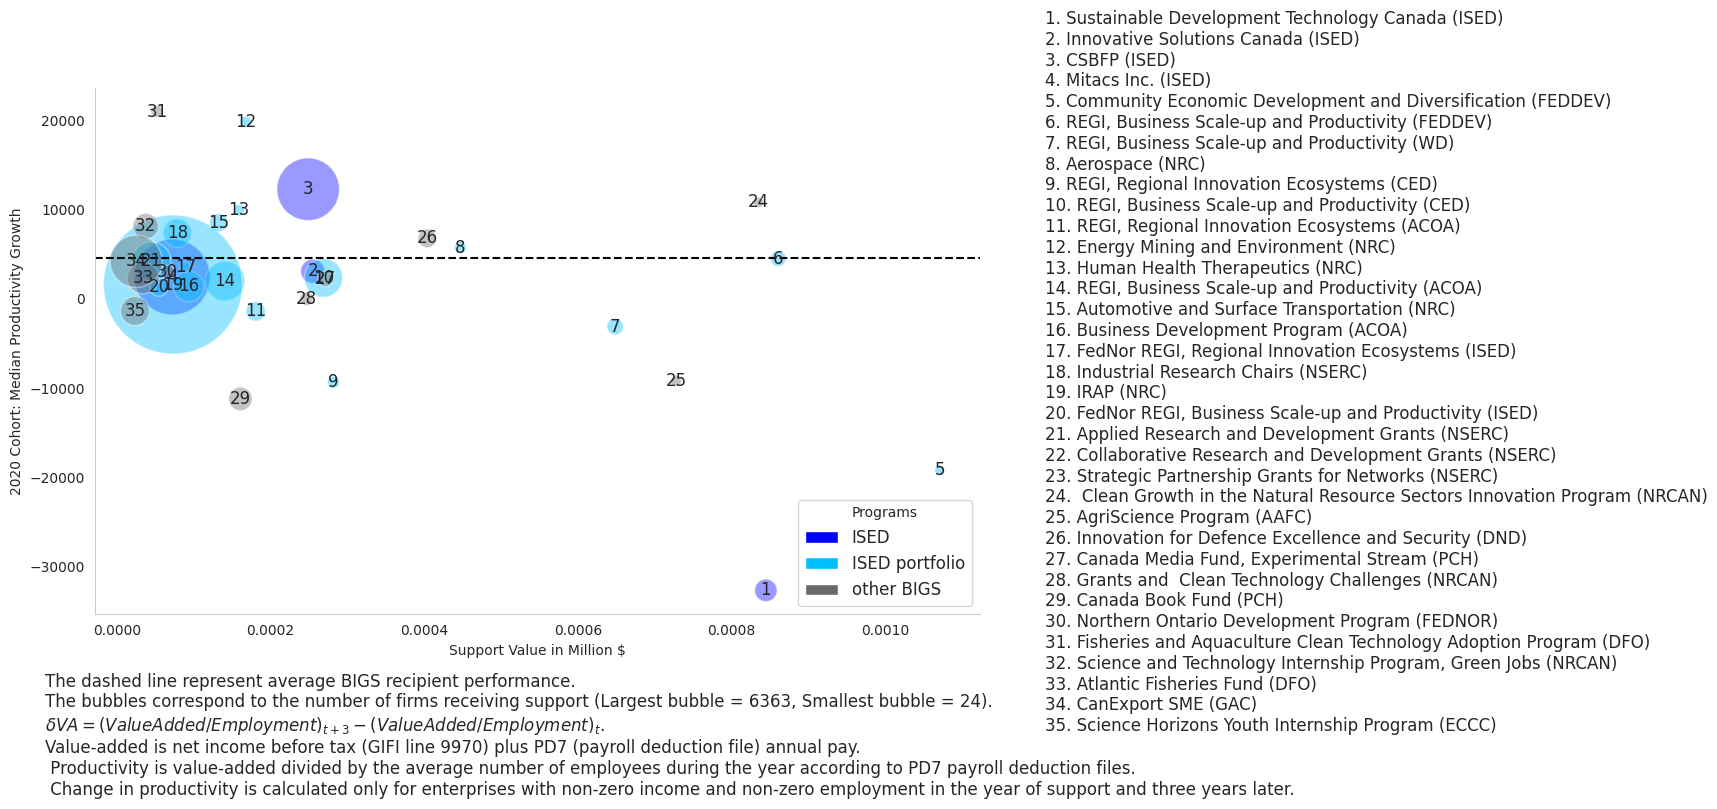

In [42]:
# @title Average Support Value vs. Productivity Growth
# for y in 2014, 2015, 2016, 2017, 2018, 2019, 2020:
for y in [2020]:
  plt.figure(figsize=(10, 6))
  data = df[df['year'] == y].copy()

  data.loc[:, 'color'] = 'dimgrey'
  data.loc[data['program'].str.contains('ISED'), 'color'] = 'blue'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'color'] = 'deepskyblue'

  data.loc[:, 'ised_portfolio'] = 'other BIGS'
  data.loc[data['program'].str.contains('ISED'), 'ised_portfolio'] = 'ISED'
  data.loc[data['program'].str.contains('|'.join(ISED_porfolio_list2)), 'ised_portfolio'] = 'ISED Porfolio'

  data.loc[:, 'agency'] = [p.split(' - ')[0] for p in data.program]
  data.loc[:, 'agency'] = [p.split('_')[0] for p in data.agency]
  data.loc[:, 'programs'] = [p.split(' - ')[1:] for p in data.program]
  data.loc[:, 'program'] = [', '.join(p) + ' (' + a + ')' for p, a in zip(data['programs'], data['agency'])]

  # rename program labels
  data.loc[:, 'program'] = data['program'].str.replace('Regional Economic Growth Through Innovation', 'REGI', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Canada Small Business Financing Program', 'CSBFP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Strategic Innovation Fund', 'SIF', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Industrial Research Assistance Program', 'IRAP', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('Contributions in Support of', '', regex=False)
  data.loc[:, 'program'] = data['program'].str.replace('All program streams excluding IRAP', 'Non-IRAP', regex=False)

  # Remove everything after the underscore
  # data['program_id'] = [p.split('_')[0] for p in data.program_id.unique()]
  data = data.sort_values(['ised_portfolio', 'avg_support'], ascending=[True, False])

  #drop SIF because its value is too large
  data = data[data['program'] != 'SIF (ISED)']

  sns.set_palette(['blue', 'deepskyblue', 'dimgrey'])
  sns.scatterplot(x='avg_support', y='median_prod', hue='ised_portfolio', size='num_pos_inc3',
                  color ='color', linewidth=1, alpha = 0.4,
                  legend=False, sizes=(50,10000), data=data)

  # Annotate each point with a unique number
  texts = []
  program_mapping = []
  for i in range(len(data)):
    number = i + 1
    texts.append(plt.text(data.iloc[i]['avg_support'], data.iloc[i]['median_prod'], str(number),
                          fontsize=12, ha='center', va='center'))
    program_mapping.append(f"{number}. {data.iloc[i]['program']}")

  legend_elements = [
    Patch(facecolor='blue', label='ISED'),
    Patch(facecolor='deepskyblue', label='ISED portfolio'),
    Patch(facecolor='dimgrey', label='other BIGS')
  ]
  # Remove top and right spines
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  plt.tight_layout()
  plt.legend(title='Programs', loc='lower right', handles=legend_elements, fontsize=12)
  text = "The dashed line represent average BIGS recipient performance. \nThe bubbles correspond to the number of firms receiving support (Largest bubble = 6363, Smallest bubble = 24). \n$\delta VA = {(Value Added / Employment)}_{t+3} - {(Value Added / Employment)}_{t}$. \nValue-added is net income before tax (GIFI line 9970) plus PD7 (payroll deduction file) annual pay. \n Productivity is value-added divided by the average number of employees during the year according to PD7 payroll deduction files. \n Change in productivity is calculated only for enterprises with non-zero income and non-zero employment in the year of support and three years later."

  plt.figtext(0.05 , 0, text, fontsize=12, ha='left', va='top')

  # Display the numbered list of programs next to the figure
  mapping_text = "\n".join(program_mapping)
  plt.figtext(1.05, 0.5, mapping_text, fontsize=12, ha='left', va='center')

  # add a horizontal line at y = 0
  plt.axhline(y=4619, color='black', linestyle='--')
  plt.grid(False)
  plt.xlabel('Support Value in Million $')
  plt.ylabel(f'{y} Cohort: Median Productivity Growth')
  plt.savefig(f'prod_gr_program_{y}.png', bbox_inches='tight')
  plt.show()